# Marketing Suite - Gold Product EDA (2023)

> # Summary
>Summarized below are the highlights from the key findings from this analysis. Based on the 12 month period in 2023:
>
>General Performance Report
>* Total revenue for Marketing Suite - Gold in 2023 is 69834.1300 dollars. It is profitable, with total net profit at 7367.5855 dollars. This put Marketing Suite - Gold's profit margin at around 10.5%.
>* In the initial months, revenue growth had been negative (-52% CMGR in February). Growth start to be positive by April, where positive numbers then fluctuate by month. In December the CMGR is around 11% growth. On average, CMGR is around 7.6%.
>* On average, Marketing Suite - Gold have around 60 users each month, with 20 being active. There is a 80% likelihood of users churning in the next month.
>
>Monthly Cohort Analysis
>* Overall, active user numbers would drop to to 1-2 users, regardless of the number of users in the initial months. Retention rate would increase mid-year (around July) to a rate around 40%, at best. Exceptions are rare, such as the May cohort which had 72.73% retention rate in September (the highest all-year across all cohorts).
>* Most NDR rates are below 100% (with most below 50%). Rare exceptions occur, in Q4 periods (September cohort had 155.43% and 104.86% NDR in October and December). October cohort had 240.81% NDR in December (this marks the highest for Marketing Suite - Gold).
>* Though retention rate is underperforming, in cumulative revenue there is an upwards trend for many cohorts. Five cohorts reached above 8k by December (January, March, April, May, and June cohort).  At least 3 cohorts have subsequent purchases which increase significantly from October to November (the earlier cohorts; January, March and May).
>* There are some negative profit values, though relatively small. On a per user basis, this can be seen in the later cohorts (November and October cohort), with October cohort being the highest cause for loss (by December -19.61 in losses per user). 
>
>Profitability
>* Pre-discounts, Marketing Suite - Gold consistently had positive profits. Negative profits are few and limited in value, with the highest being in June (30.64) and January (20.96).
>* Before discounts, November and December show the highest positive profits, with November at 1988.80 and December at 1643.42. High profits at the the end of the year might indicate year-end activities, holiday season demand, and businesses utilizing remaining budgets. January and February have relatively lower positive profits, compared to other months (414.2399 and 276.2858, respectively). Lower profits at the start of the year might be attributed to businesses and individuals who cut back on spending after the holiday season.
>
>Discounting EDA
>* There are 289 orders for Marketing Suite - Gold in 2023, 110 of which were applied discounts (~41%). With more orders being without discounts, this suggests a strong demand for Marketing Suite - Gold, with customers willing to pay the full price.
>* November and December remain the most profitable months after discounts, with November at 1333.7486 and December at 1444.6300, driven by year-end activities and spending.
>* January and February remain the lowest profitable months after discounts, thought still retaining positive profit. January have 89.6395 in overall profit and February have 198.8714. Lower values reflects post-holiday slowdowns and initial costs.
>* Discounted orders are all 20% discounts. Since all discounts were consistently 20%, impact of discounts on both negative and positive profits appears to be balanced across all months.
>* For the 0% discount range in November and December, minimum profits are 0, with averages (mean, median, 75%) around 50, indicating most profits without discounts aren't very high. Maximum profits are much higher (473.61 for Nov, 290.01 for Dec), suggesting outliers are driving higher profits.
>* Across all months, average (mean) profit values for the 20% discount range are all negative. This suggest that on average, a discount of 20% is already too steep for Marketing Suite - Gold, cutting into profits.
>
>Ideal Customer Profile (ICP) EDA
>* Strategic segment is the top priority, driving 42.16% of net revenue and 41.86% of sales, with a net profit of 3,912.48. The Enterprise segment, contributing 24.81% of net revenue and 24.50% of sales, with a net profit of 1,889.51, also plays a significant role. SMB follows closely with 33.02% of net revenue and 33.64% of sales, with a net profit of 1,565.60. Focus on improving the Strategic segment, while giving secondary consideration to Enterprise and SMB segments.
>* In the Strategic segment, Finance in AMER, Manufacturing in APJ and EMEA, and Tech in AMER are top performers and should be the primary focus for marketing efforts.
>* For the Enterprise segment, focus on Finance in AMER, Communications in EMEA, Energy in EMEA, and Tech in AMER for strategic growth.
>* For the SMB segment, Healthcare in AMER, Finance in EMEA, and Manufacturing in both EMEA and AMER are excelling.
>* AMER leads in both sales and net profit, especially in December, April, and August. However, the region experiences fluctuations impacting revenue stability and financial planning. Discounts significantly reduce profits in April, July, October, and November.
>* EMEA have overall positive sales and net profit, but faces challenges with discounts causing negative net profits in August and September.
>* APJ have the lowest sales and net profit, but still contributes positively. Frequently encounters negative net profits due to discounts, especially in January, April, and September, impacting overall revenue.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')
pd.set_option('display.max_columns',30)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
df = pd.read_csv('SaaS-Sales.csv')
df=df.drop('Row ID',axis=1)
df=df[[ 
        'Order ID',                        
        'Order Date',              
        'Date Key',                
    #'Contact Name',            
        'Customer ID',                 
        'Customer',               
        'Segment',                 
        'Industry',                
        'Region',                 
        'Subregion', 
        'Country', 
        'City', 
    #'License',   
        'Product',
        'Sales', 
        'Quantity', 
        'Discount', 
        'Profit']]

In [3]:
# Rekayasa fitur dan pembuatan kolom2 baru untuk keperluan analisis bisnis

# nilai diskon dalam bentuk dolar 
df['total_discount_in_dollars']=df['Sales'] * df['Discount']

# nilai sales satu unit produk
df['selling_price']=df['Sales'] / df['Quantity'] 

# net profit sebelum penerapan diskon
df['(net)_profit_before_discount']=df['Sales'] * df['Discount'] + df['Profit']

# net profit untuk penjualan 1 unit produk
df['net_profit_per_unit_sold']=df['Profit'] / df['Quantity'] 

# ubah nama kolom Profit menjadi 'net_profit'
df=df.rename(columns={'Profit':'net_profit'}) 

# melihat profit margin, idealnya SaaS diatas 20%
df['profit_margin']=df['net_profit'] / df['Sales'] * 100 

# pertimbangan nilai sales dari penerapan diskon
df['discounted_sales']=df['Sales'] - (df['Discount']*df['Sales']) 

In [4]:
# Rekayasa fitur, mengubah dari tipe data objek menjadi tipe data datetime untuk ekstraksi tahun dan bulan
df['Order Date'] = pd.DatetimeIndex(df['Order Date'])
df['month']=df['Order Date'].dt.month
df['year']=df['Order Date'].dt.year
df['year_month'] = df['Order Date'].dt.to_period('M')

In [5]:
# for later cohort analysis, make a template for monthly period to see user activity by months
min_month = df['Order Date'].values.astype('datetime64[M]').min()
max_month = df['Order Date'].values.astype('datetime64[M]').max()
template_table = pd.DataFrame(pd.date_range(min_month,max_month,freq='MS'))
template_table.columns = ['Month']
# to merge month template with other df, with 'key'
template_table['key'] = 1

In [6]:
#slice main df by product first
prod4 = df.query("Product == 'Marketing Suite - Gold'")
# then slice product df by year of analysis
prod4_2023=prod4.query('year == 2023')

### General Performance Report

In [7]:
# new column in product df to show each customer/user first purchase for the 2023 period, as "reg_date" or registration date
prod4_2023['reg_date'] = prod4_2023.groupby('Customer ID')[['Order Date']].transform('min')

C:\Users\arizk\AppData\Local\Temp\ipykernel_2060\1983016460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod4_2023['reg_date'] = prod4_2023.groupby('Customer ID')[['Order Date']].transform('min')


In [8]:
# make a user df, from the product df
prod4_2023_user = prod4_2023.groupby(['Customer ID','Customer'])['reg_date'].min().reset_index()

In [9]:
# from user df, extract month datetime data, from date of first purchase
prod4_2023_user['reg_month']= prod4_2023_user['reg_date'].values.astype('datetime64[M]')

In [10]:
# with the month template df which only contains full 12 month timeframe, merge with user df
prod4_2023_user['key'] = 1
prod4_2023_user = template_table.merge(prod4_2023_user,on='key')
prod4_2023_user =prod4_2023_user.drop('key',axis=1)

In [11]:
# need to be rid of extra rows now, since merging with a month template means that there are null customer ids which doesn't make sense timewise.
prod4_2023_user = prod4_2023_user[prod4_2023_user['Month']>=prod4_2023_user['reg_month']]

In [12]:
prod4_2023['Month'] = prod4_2023['Order Date'].values.astype('datetime64[M]')
sales_month = prod4_2023.groupby(['Customer ID','Month'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
account = prod4_2023.groupby(['Customer ID','Month'])[['Order ID']].nunique().reset_index()
account.columns = ['Customer ID','Month', 'account']
prod4_2023_user = prod4_2023_user.merge(sales_month,how='left',on=['Customer ID','Month'])
prod4_2023_user = prod4_2023_user.merge(account,how='left',on=['Customer ID','Month'])

C:\Users\arizk\AppData\Local\Temp\ipykernel_2060\4020600874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod4_2023['Month'] = prod4_2023['Order Date'].values.astype('datetime64[M]')


In [13]:
prod4_2023_user['user'] = 1    
prod4_2023_user['new user'] = (prod4_2023_user['reg_month'] == prod4_2023_user['Month']) * 1 
prod4_2023_user['active'] = (prod4_2023_user['Sales'] > 0) * 1   
prod4_2023_user['active_prev'] = (prod4_2023_user.sort_values(by=['Month'], ascending=True)
.groupby(['Customer ID'])['active'].shift(1))
prod4_2023_user['change_status'] = (prod4_2023_user['active'] != prod4_2023_user['active_prev']) * 1
prod4_2023_user['session_id'] = (prod4_2023_user.sort_values(by=['Month'], ascending=True)
                       .groupby(['Customer ID'])['change_status'].cumsum())
prod4_2023_user['inactive'] = (prod4_2023_user['active'] == 0) * 1
prod4_2023_user['month_inactive'] = (prod4_2023_user.sort_values(by=['Month'], ascending=True)
.groupby(['Customer ID','session_id'])['inactive'].cumsum())

In [14]:
#Marketing Suite - Gold monthly user report (2023)
prod4_2023_report = prod4_2023_user.groupby('Month')[['Quantity', 'account', 'Sales', 'discounted_sales', '(net)_profit_before_discount' ,'net_profit', 'user','new user','active']].agg('sum')
prod4_2023_report

,Quantity,account,Sales,discounted_sales,(net)_profit_before_discount,net_profit,user,new user,active
Month,,,,,,,,,
2023-01-01,63.0000,12.0000,3382.3580,3078.7164,393.2811,89.6395,12,12,12
2023-02-01,24.0000,7.0000,1626.9720,1549.5576,276.2858,198.8714,19,7,7
2023-03-01,68.0000,20.0000,3815.4520,3756.4616,547.8194,488.8290,33,14,19
2023-04-01,45.0000,14.0000,6026.4680,5692.1144,1070.1406,735.7870,42,9,12
2023-05-01,60.0000,15.0000,4684.7240,4413.2552,666.2179,394.7491,53,11,15
2023-06-01,89.0000,24.0000,6366.6620,5694.5596,1210.4309,538.3285,66,13,22
2023-07-01,73.0000,16.0000,4172.0140,3893.1692,901.8474,623.0026,72,6,15
2023-08-01,90.0000,23.0000,6241.0700,5715.4140,969.5085,443.8525,77,5,20
2023-09-01,125.0000,38.0000,5301.7680,5028.4544,849.6700,576.3564,84,7,34


> To use some kind of SaaS KPI metrics from this dataset is quite a task. We need to calculate, among others, churn rate. But since it is a fictional dataset, and there isn't a clear guideline on what defines churn from the company (1 month, 2 month inactive and so on), here I'll just use the total number of old active users divided by total users at the beginning of the month, and using that number to substract 1. This would give an estimate of how many users stop purchasing/not active (churning) on a monthly period. But this doesn't reflect real churn rate as customers who might have churned more than 1 month can be counted as active if they make a purchase. For estimation purposes only. 

In [15]:
prod4_2023_churn = prod4_2023_user.groupby('Month')[['Sales', 'net_profit', 'user','new user','active']].agg('sum')
prod4_2023_churn['old active'] = (prod4_2023_churn['active'] - prod4_2023_churn['new user'])
prod4_2023_churn['user churn'] = ((1 - (prod4_2023_churn['old active'] / prod4_2023_churn['user'].shift(1))) * 100).round()
prod4_2023_churn

,Sales,net_profit,user,new user,active,old active,user churn
Month,,,,,,,
2023-01-01,3382.3580,89.6395,12,12,12,0,NaN
2023-02-01,1626.9720,198.8714,19,7,7,0,100.0000
2023-03-01,3815.4520,488.8290,33,14,19,5,74.0000
2023-04-01,6026.4680,735.7870,42,9,12,3,91.0000
2023-05-01,4684.7240,394.7491,53,11,15,4,90.0000
2023-06-01,6366.6620,538.3285,66,13,22,9,83.0000
2023-07-01,4172.0140,623.0026,72,6,15,9,86.0000
2023-08-01,6241.0700,443.8525,77,5,20,15,79.0000
2023-09-01,5301.7680,576.3564,84,7,34,27,65.0000


>Here we can see that user churn is abnormally high, as SaaS monthly churn rate is usually only 5-10%. But the reality is such. As the dataset fictional, and there isn't any kind of subscription data, we can leave it as is. Furthermore, it should be noted that the lack of any subcription data makes it unrealistic to do a recurring revenue KPI (average revenue per user, monthly recurring revenue, etc).

In [17]:
#monthly avg. user churn
prod4_2023_churn[["user", "active", "user churn"]].mean()

user         60.4167
active       19.9167
user churn   80.1818
dtype: float64

In [20]:
# calculating Compound Monthly Growth Rate (CMGR) for the past 12 month
sales_report=pd.DataFrame(prod4_2023.groupby(['month'])[['Sales', 'net_profit']].sum()).reset_index()

for ind, row in sales_report.iterrows():
    sales_report.loc[ind, "month difference"] = row['month'] - 1

sales_report['CMGR'] = np.power(sales_report['Sales'] / 3382.3580, #<---first month sales
(1 / sales_report['month difference'])) - 1
sales_report ['CMGR'] = (sales_report ['CMGR']) * 100
sales_report = sales_report.drop(['month difference'], axis=1)

#with pd.option_context('use_inf_as_na', True):
    #sales_report = sales_report.dropna(subset=['CMGR'], how='all')
    
sales_report


,month,Sales,net_profit,CMGR
0,1,3382.3580,89.6395,0.0000
1,2,1626.9720,198.8714,-51.8983
2,3,3815.4520,488.8290,6.2095
3,4,6026.4680,735.7870,21.2312
4,5,4684.7240,394.7491,8.4841
5,6,6366.6620,538.3285,13.4850
6,7,4172.0140,623.0026,3.5590
7,8,6241.0700,443.8525,9.1455
8,9,5301.7680,576.3564,5.7792
9,10,6104.2880,499.7909,6.7802


In [21]:
# CMGR doesn't reflect all months growth rate, so Im going to use mean or median.
sales_report['CMGR'].skew()

-2.917556865466335

In [22]:
#The CMGR is skewed (negative), median is closest I can get to an average
sales_report['CMGR'].median()

7.632136953961255

In [24]:
prod4_2023[['Sales', 'net_profit']].sum()

Sales        69834.1300
net_profit    7367.5855
dtype: float64

In [25]:
# Total monthly profit margin
(7367.5855/ 69834.1300) * 100

10.550121409116144

In [26]:
sales_report[['Sales', 'net_profit']].corr()

,Sales,net_profit
Sales,1.0000,0.9196
net_profit,0.9196,1.0000


**Key findings:**
1. On average, Marketing Suite - Gold have around 60 users each month, with 20 being active. There is a 80% likelihood of users churning in the next month. Number of accounts and quantity of purchases tend to increase by the end of the year starting from September, but number of new users decrease (only 5 new user in December)
2. In the initial months, revenue growth had been negative (-52% CMGR in February). Growth start to be positive by April, where positive numbers then fluctuate by month. In December the CMGR is around 11% growth. On average, CMGR is around 7.6%.
3. Total revenue for Marketing Suite - Gold in 2023 is 69834.1300 dollars. It is profitable, with total net profit at 7367.5855 dollars. This put Marketing Suite - Gold's profit margin at around 10.5 %.
4. Based on total monthly data, increase in monthly revenue for Marketing Suite - Gold seems to equal an increase in monthly profit. Using a correlation test, we can see that there is a strong positive correlation between revenue and profit. 

### Monthly Cohort Analysis

In [15]:
# Retention user
from operator import attrgetter
#----------------------------
# treat the month of registration as cohort
prod4_2023_user['date']=prod4_2023_user['Month'].dt.to_period('M')
prod4_2023_user['cohort']= prod4_2023_user['reg_month'].dt.to_period('M')
prod4_2023_user['lifetime'] = (prod4_2023_user['date'] - prod4_2023_user['cohort']).apply(attrgetter('n'))

In [16]:
prod4_2023_user.head(2)

,Month,Customer ID,Customer,reg_date,reg_month,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit,account,user,new user,active,active_prev,change_status,session_id,inactive,month_inactive,date,cohort,lifetime
0,2023-01-01,1017,Chevron,2023-01-27,2023-01-01,2.0000,18.1600,14.5280,5.4480,1.8160,1.0000,1,1,1,NaN,1,1,0,0,2023-01,2023-01,0
1,2023-01-01,1019,Cisco Systems,2023-01-02,2023-01-01,5.0000,454.5600,363.6480,-17.0460,-107.9580,1.0000,1,1,1,NaN,1,1,0,0,2023-01,2023-01,0


In [16]:
prod4_cohort = prod4_2023_user.groupby(['reg_month', 'lifetime'], as_index=False)[['user','new user','active']].agg('sum')
prod4_cohort ['active rate'] = (prod4_cohort['active'] / prod4_cohort['user']) * 100
prod4_cohort

,reg_month,lifetime,user,new user,active,active rate
0,2023-01-01,0,12,12,12,100.0000
1,2023-01-01,1,12,0,0,0.0000
2,2023-01-01,2,12,0,3,25.0000
3,2023-01-01,3,12,0,2,16.6667
4,2023-01-01,4,12,0,1,8.3333
...,...,...,...,...,...,...
73,2023-10-01,1,2,0,0,0.0000
74,2023-10-01,2,2,0,1,50.0000
75,2023-11-01,0,2,2,2,100.0000
76,2023-11-01,1,2,0,1,50.0000


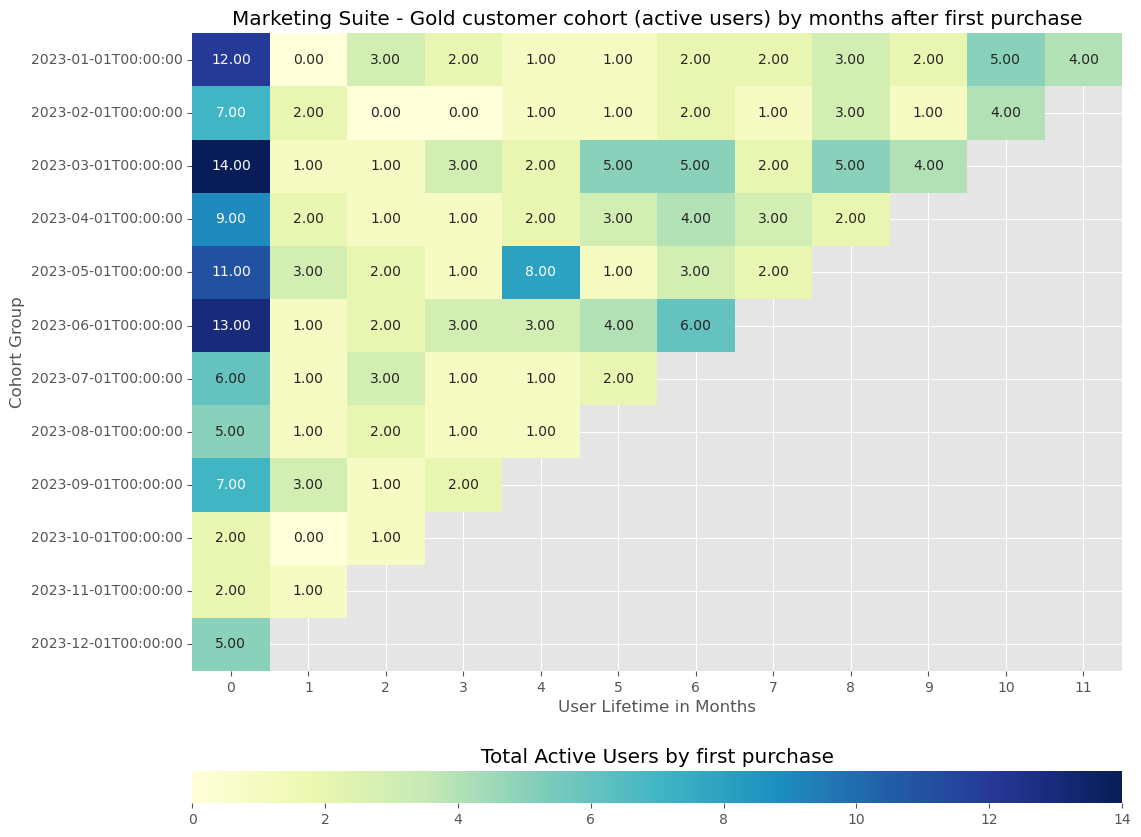

In [18]:
# customer cohort
pivot0 =prod4_cohort.pivot_table(index='reg_month', columns='lifetime', values= 'active')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot0,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='YlGnBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Marketing Suite - Gold customer cohort (active users) by months after first purchase',
    xlabel='User Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Total Active Users by first purchase'
)

plt.show()

- Highest number of users in the initial month can be observed in the March cohort (14 active users). January, May and June cohorts have also have a relatively high initial active users (12, 11, 13 active users respectively).
- Generally for cohorts, active user numbers fall significantly after initial month to 1-2 users, regardless of the number of users in the initial months.

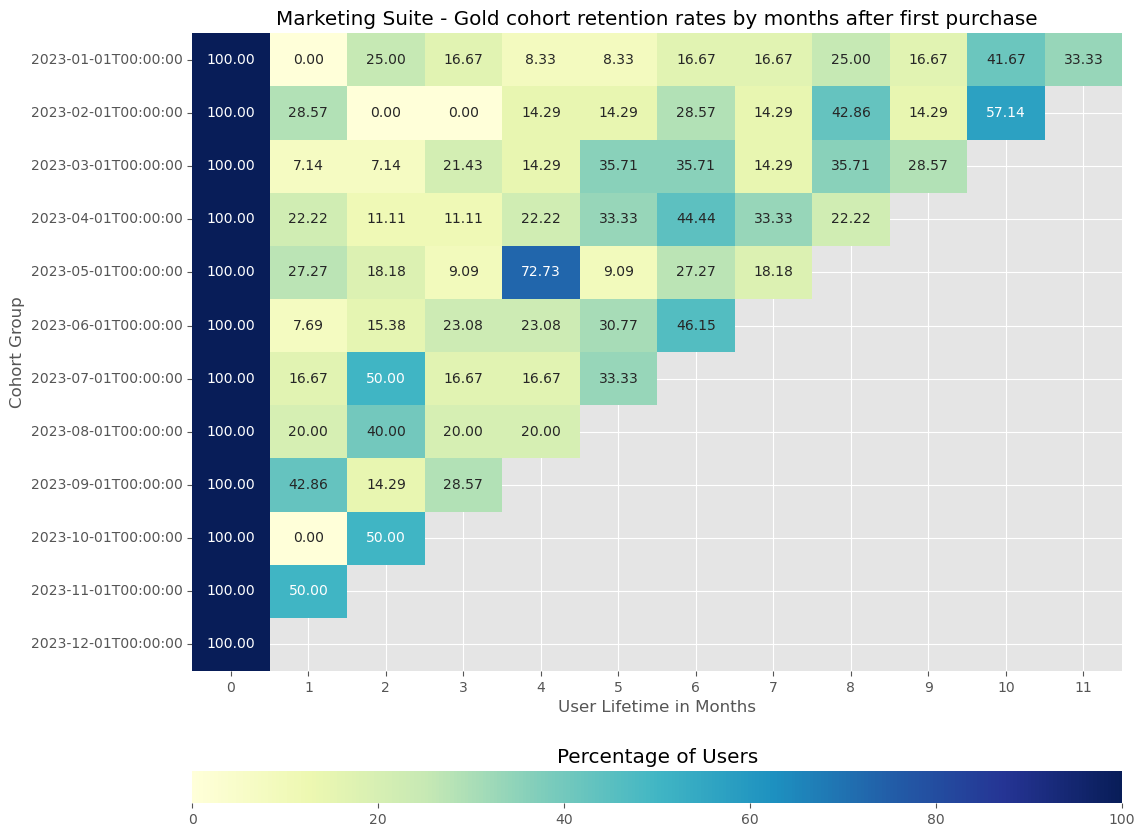

In [19]:
# customer retention
pivot1 =prod4_cohort.pivot_table(index='reg_month', columns='lifetime', values= 'active rate')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot1,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='YlGnBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Marketing Suite - Gold cohort retention rates by months after first purchase',
    xlabel='User Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Percentage of Users'
)

plt.show()

- For all cohorts, retention rate drop significantly after the initial purchase month. 
- Generally, retention rates for cohorts will increase during the end-of-year period, earliest in July.

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

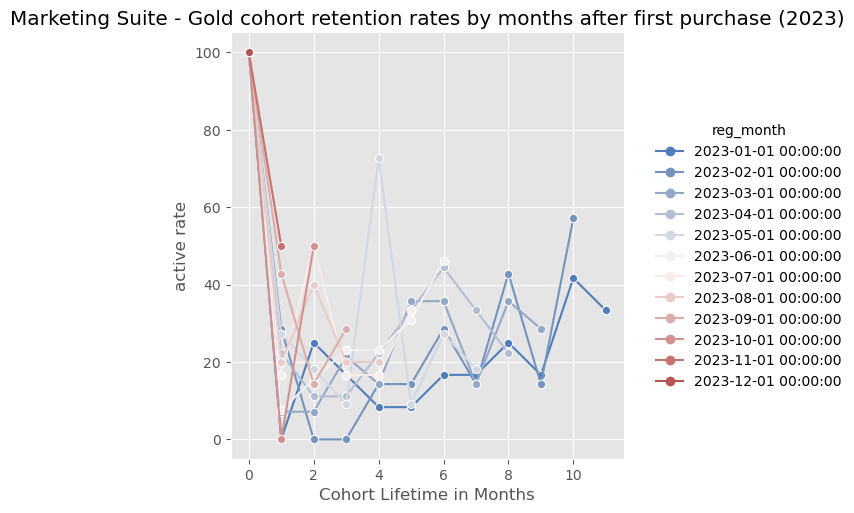

In [20]:
# retention rate lineplots
sns.relplot(data=prod4_cohort, x="lifetime", y="active rate",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Marketing Suite - Gold cohort retention rates by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

- Most retention rates falls below 40%.
- May cohort has a relatively significant retention rate 4 months in their lifetime (in September), at 72.73% retention rate. This is the highest retention for Marketing Suite after its initial month.  

In [17]:
prod4_cohort2 =prod4_2023_user.groupby(['reg_month', 'lifetime'], as_index=False)[['Quantity', 'account', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].agg('sum') 

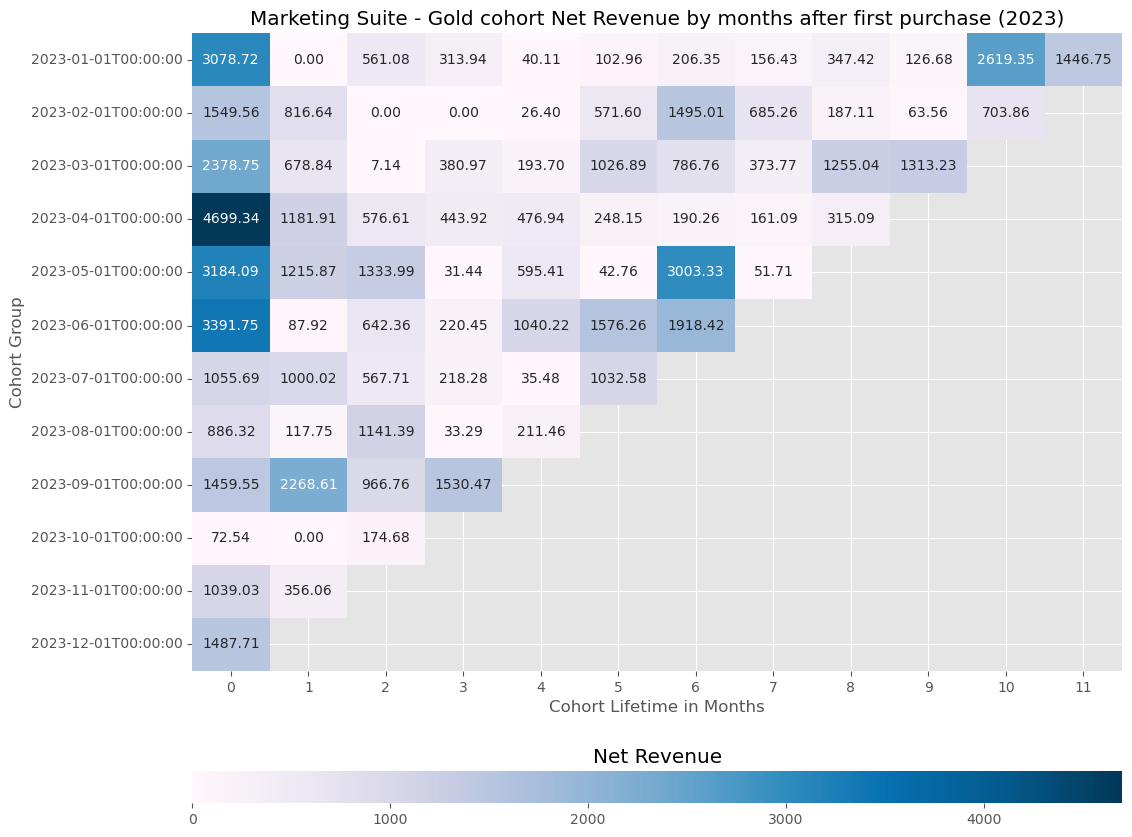

In [22]:
# Net Revenue by Cohort
pivot2 =prod4_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'discounted_sales')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot2,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Marketing Suite - Gold cohort Net Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Net Revenue'
)

plt.show()

- September cohort have significant subsequent purchases after its initial purchase (1459.55), especially in October where the purchase exceed the initial month's purchase (2268.61). This is the only case for Marketing Suite - Gold where a cohort has a purchase that exceeds its initial month's purchase.
- April cohort has the highest initial purchase at 4699.34, though afterwards its purchases decreases each month, reaching 315.09 by December.   

In [18]:
# calculating Net Dollar Retention (NDR), using initial month summed discounted sales
ds_max = prod4_2023_user.loc[prod4_2023_user['lifetime'] <= 0].groupby('reg_month')['discounted_sales'].sum().to_frame('ds_max')
prod4_cohort2 = prod4_cohort2.merge(ds_max,how='left',on=['reg_month'])
prod4_cohort2 ['net dollar retention'] = (prod4_cohort2['discounted_sales'] / prod4_cohort2['ds_max']) * 100

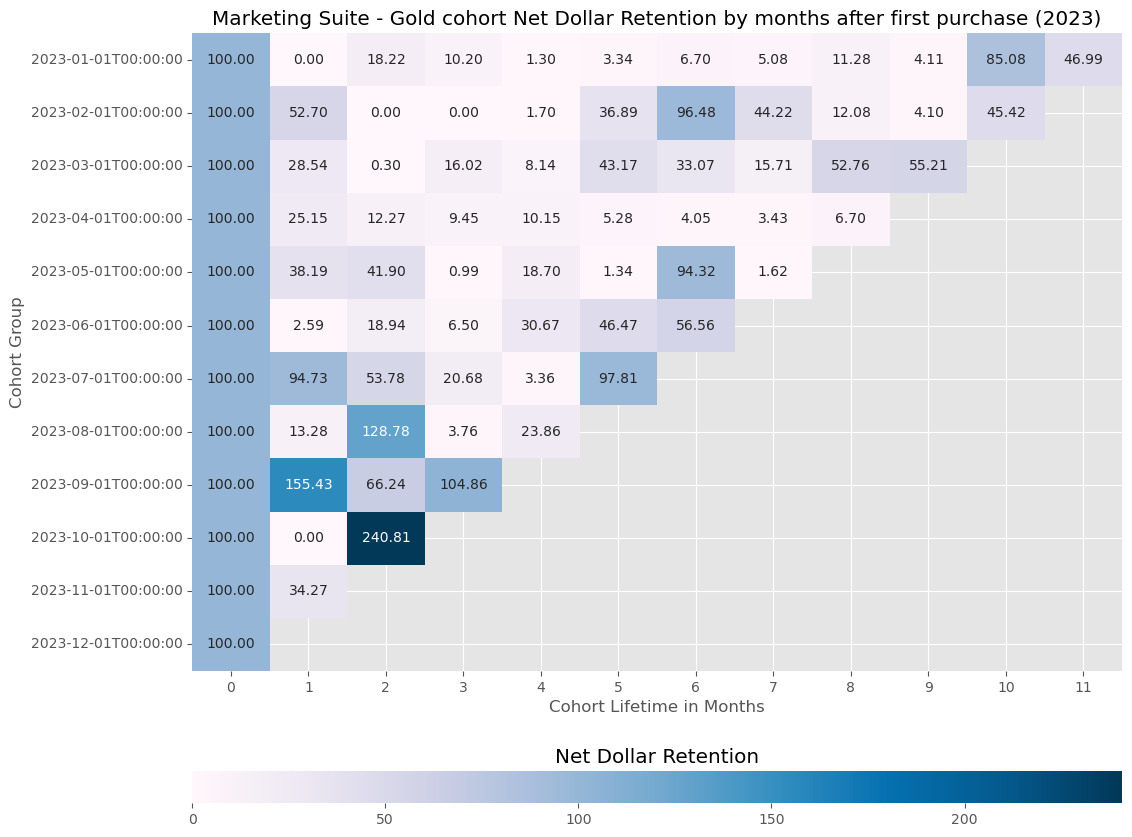

In [24]:
# Net Dollar/Revenue Retention
pivot3 =prod4_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'net dollar retention')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot3,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Marketing Suite - Gold cohort Net Dollar Retention by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Net Dollar Retention'
)

plt.show()

*Notes
- in SaaS, especially B2B, NDR is extremely important. An NDR above 110% are, among other things, signs of underpricing (meaning that your product value is more than you realize, that some companies are getting more value out of your product than the value they could give to you). Its is also a sign of cohort growth, and that companies should try upselling, improving their products and getting more users on top of their growing existing users.
- under 100%, especially for Enterprise-level B2B SaaS, means that there is something wrong. Customer churn, they don't love the product. Rather than trying to get new users (investing in sales and marketing), B2B SaaS should try to ask their customers on why they're churning and invest on product improvement.

- for Marketing Suite - Gold, generally NDR rates are below 100% (with most below 50%).
- There are months where rates exceed 100% after initial purchase. These rates occur in October and December. In October, the September cohort made a purchase amounting to 155.43% in NDR. In December, there are two instances: September cohort (104.86%) and October cohort (240.81%).

In [19]:
prod4_cohort2 ['cumulative lifetime revenue'] = prod4_cohort2.groupby(['reg_month'])['discounted_sales'].cumsum()

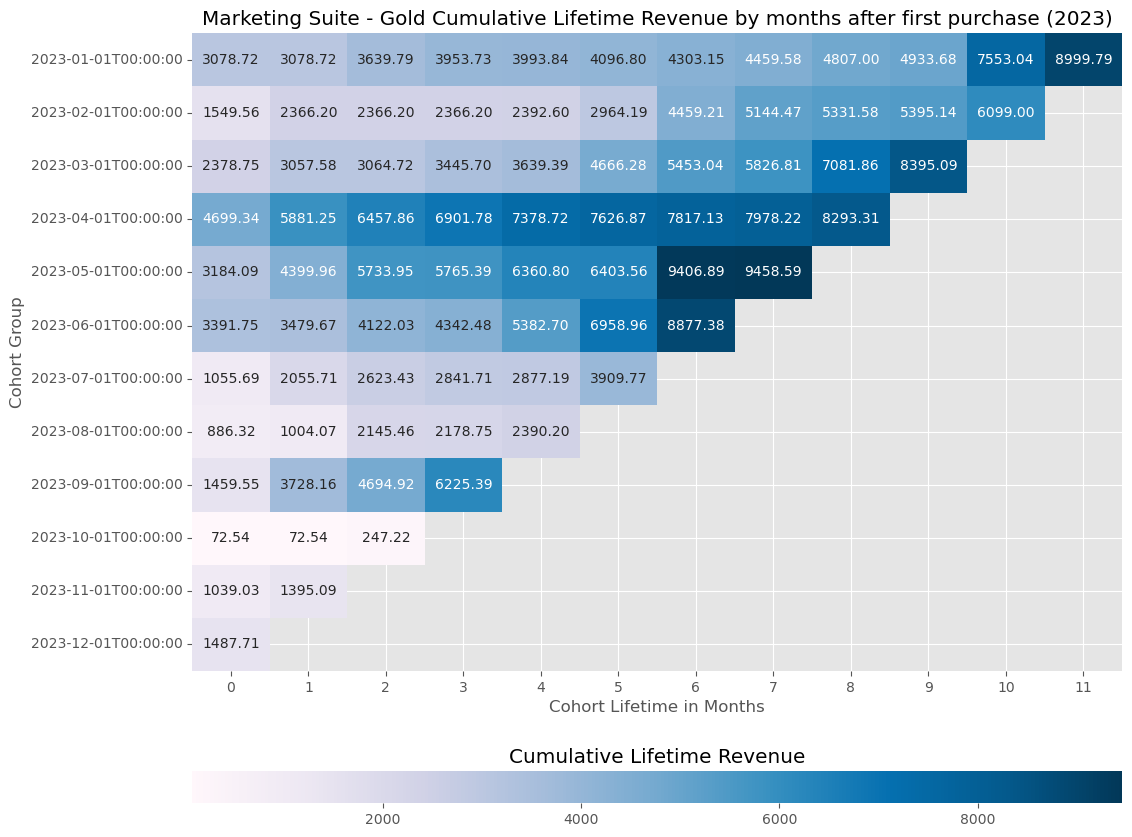

In [26]:
# cumulative lifetime revenue by cohort
pivot4 =prod4_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'cumulative lifetime revenue')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot4,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Marketing Suite - Gold Cumulative Lifetime Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Cumulative Lifetime Revenue'
)

plt.show()

Cumulative lifetime revenue adds up all the revenue purchases starting from the initial purchase, so that by the end of the month (and by subsequents months), you can see totals of revenue purchases.

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

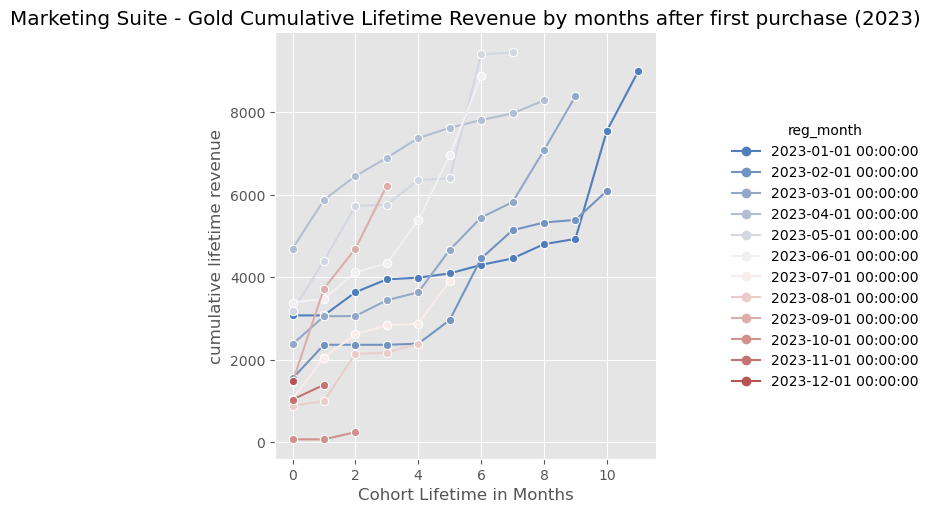

In [ ]:
# some data are easier to read with a different chart- cumulative lifetime revenue lineplots
sns.relplot(data=prod4_cohort2 , x="lifetime", y="cumulative lifetime revenue",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Marketing Suite - Gold Cumulative Lifetime Revenue by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

- We can see many upwards trend for many cohorts based on its cumulative revenue. This meant that subsequent purchases are occurring. 5 cohorts reached above 8k by December (January, March, April, May, and June cohort).
- For January, March, and May cohort, we can see subsequent purchases increasing significantly from Oktober to November (third to second point before the end point in each cohort's line plot).

In [20]:
# calculating Customer Lifetime Revenue, using initial month number of active users
user_max = prod4_2023_user.loc[prod4_2023_user['lifetime'] <= 0].groupby('reg_month')['active'].sum().to_frame('user_max')
prod4_cohort2 = prod4_cohort2.merge(user_max,how='left',on=['reg_month'])
prod4_cohort2 ['customer lifetime revenue'] = (prod4_cohort2['cumulative lifetime revenue'] / prod4_cohort2['user_max'])

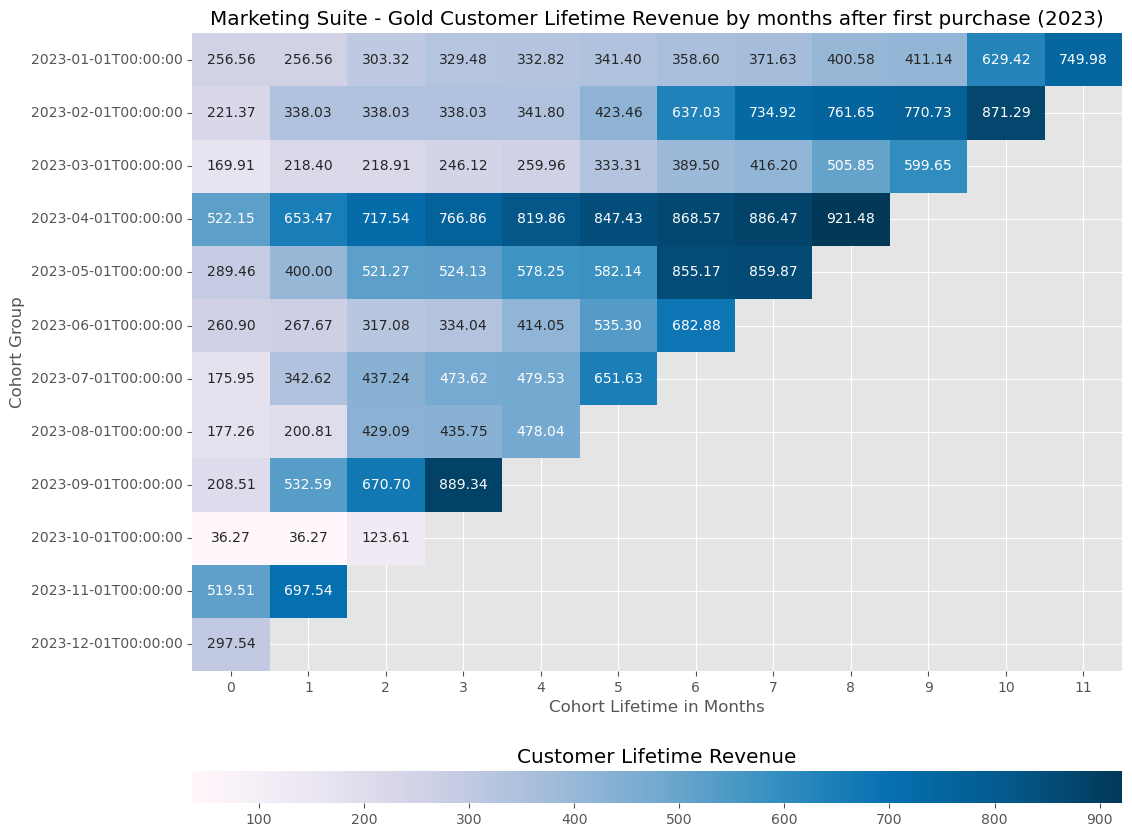

In [28]:
# per user Customer Lifetime Revenue, by cohort
pivot5 =prod4_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'customer lifetime revenue')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot5,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Marketing Suite - Gold Customer Lifetime Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Customer Lifetime Revenue'
)

plt.show()

Customer Lifetime Revenue gives an average of how much each customer in the cohort spends each month (on a per-customer basis).

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

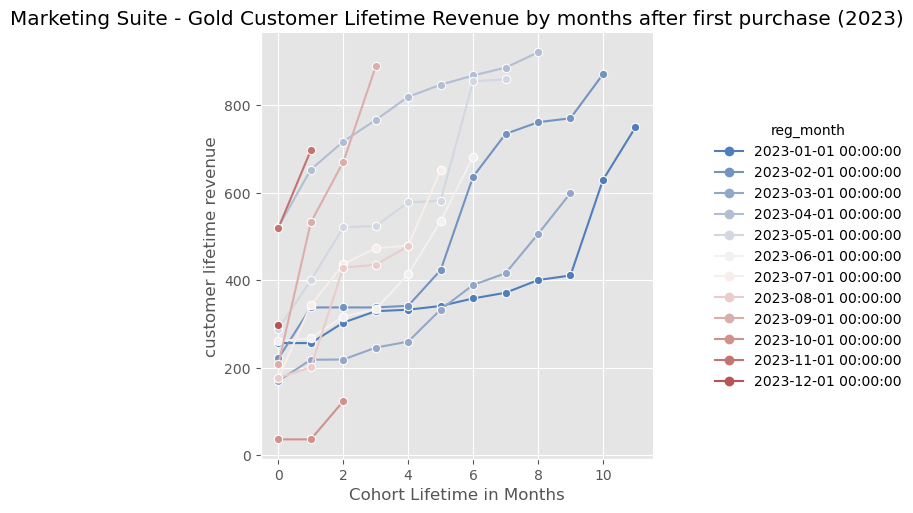

In [22]:
#  customer lifetime revenue lineplots
sns.relplot(data=prod4_cohort2, x="lifetime", y="customer lifetime revenue",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Marketing Suite - Gold Customer Lifetime Revenue by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

- Following the pattern of cumulative revenue, on a per-user basis we also can see upwards trend for many cohorts.
- On a per-user basis, the April cohort has the highest value by December (921.48). Initial per-user value was also relatively high compared to other cohorts (522.15).
- Though it isn't the highest in per-user value, the February cohort has steady purchases from its initial per-user purchase (221.37), where by December its per-user value has reached 871.29. 
- September cohort is especially notable, starting from 208.51 to 889.34 per user by December. On a per user basis, this cohort has a significant upwards trend in its 4 months lifetime.

In [21]:
# CLV - but with net profit
prod4_cohort2 ['cum_net_profit'] = prod4_cohort2.groupby(['reg_month'])['net_profit'].cumsum()
# calculating Customer Lifetime Value, using initial month number of active users
prod4_cohort2 ['Customer Lifetime Value'] = (prod4_cohort2['cum_net_profit'] / prod4_cohort2['user_max'])

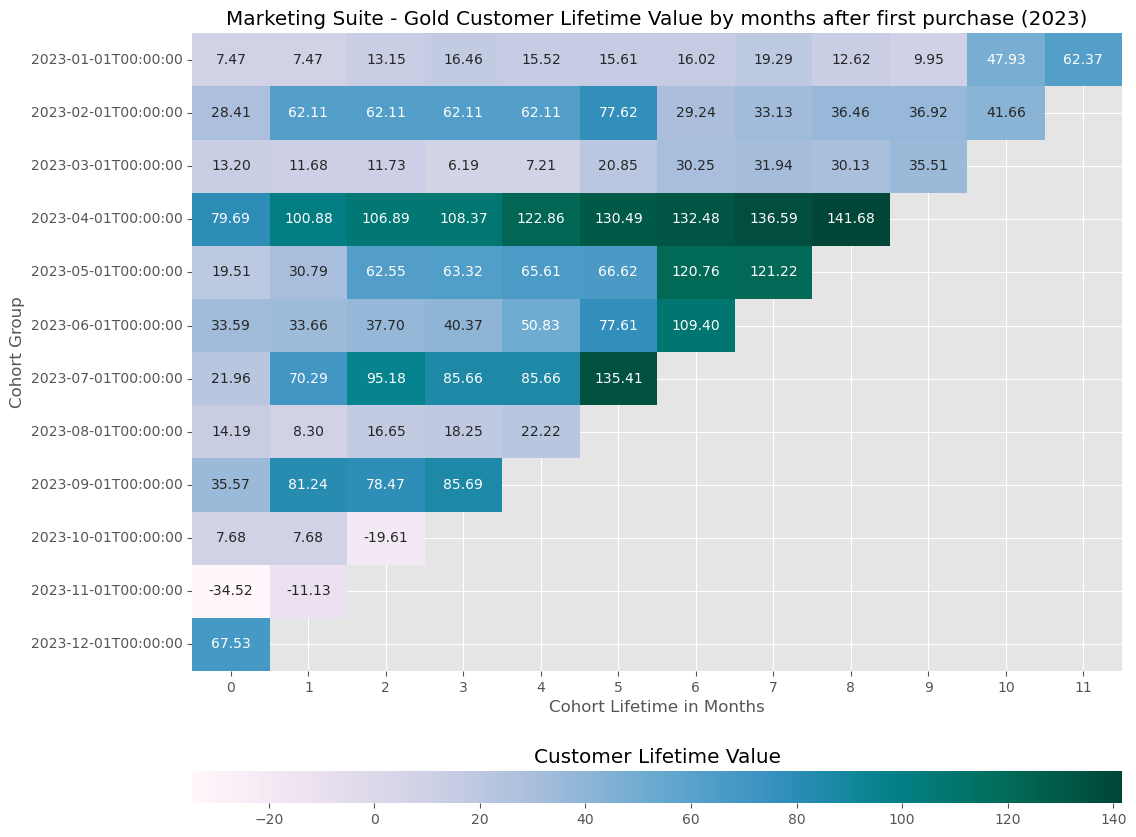

In [30]:
# Customer Lifetime Value, by cohort
pivot6 =prod4_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'Customer Lifetime Value')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot6,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBuGn',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Marketing Suite - Gold Customer Lifetime Value by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Customer Lifetime Value'
)

plt.show()

>Notes
>- Customer Lifetime Value (CLV), looks at profit instead of revenue, on a per user basis.
>- Usually, "profit" used in CLV calculation is Gross Profit, which is Revenue - Cost of Goods (cost of producing a product). Gross Profit is used to get Gross Margin rate (Gross Profit/Revenue), which then is multiplied with the Customer Lifetime Revenue to get the CLV values. CLV then reflect the profit gained on a per-user basis, after considering the production cost of a product.
>- In this dataset, however, there is no Cost of Goods Sold (COGS) data or any "expenses" data. We only have "net profit" which is Gross Profit - Other Expenses (marketing, overhead cost, taxes, etc), and so will use that in place of Gross Profit. So CLV here will be profit gained on a per-user basis after considering ALL expenses, including those not related to production cost. 
>- Lumping all expenses together may simplify things, but can provide distortion of data and less insights in real world cases. In SaaS, usually expenses not relating to production cost is related to Customer Acquisition Cost (CAC), and is used to calculate actual profit from users or customers. With CAC, you can ask questions such as: how much can we spend on getting customers, when we have a profit of ... from producing a product? Or, within context of this dataset, how much discount can we afford to actually make the most profit?

>Without expenses data, it is harder to gain accurate insights on profit and how to be accountable with profit, but its the data we have.

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

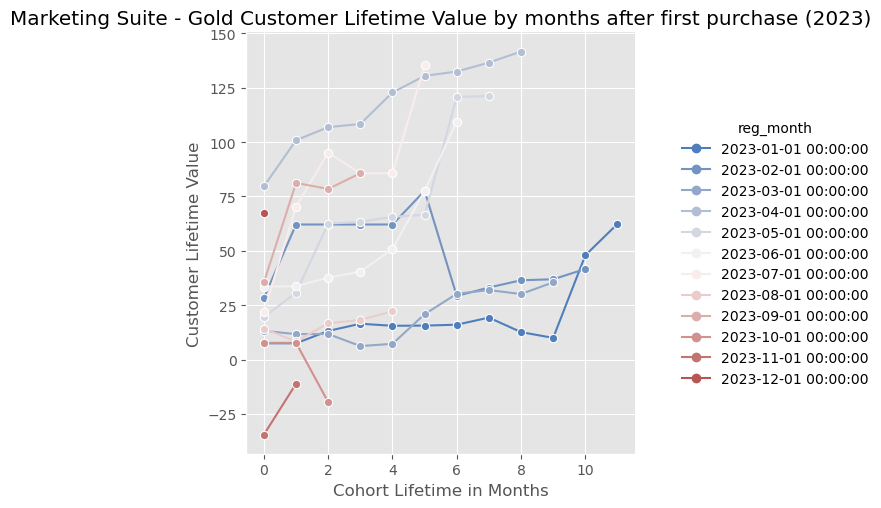

In [24]:
#  customer lifetime value lineplots
sns.relplot(data=prod4_cohort2, x="lifetime", y="Customer Lifetime Value",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Marketing Suite - Gold Customer Lifetime Value by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

-  It can be observed that there are some negative profit values per user in the cohorts, meaning that Marketing Suite - Gold is potentially contributing to losses.
- November and October cohorts contribute to losses on a per user basis. With October cohort being the highest cause for loss as it contributes -19.61 in losses per user. 
- April cohort provide the highest profits from all the cohorts per user (141.68 made by December). Based on the CLV, this cohort show the most promise. However, since this CLV value is made using net profit instead of gross profit, here Costumer Acquisition Cost (CAC) is assumed to be already accounted for. Usually, CLV values (calculated with gross profit) is measured against CAC to see the actual value of a customer. Since CAC data doesn't exist in this dataset and is taked as granted, CLV of April cohort should not be taken at face value. Just for estimation purposes.

**Key findings:**
1. Overall, active user numbers would drop to to 1-2 users, regardless of the number of users in the initial months. Retention rate would increase mid-year (around July) to a rate around 40%, at best. Exceptions are rare, such as the May cohort which had 72.73% retention rate in September (the highest all-year across all cohorts).
2. Though retention rate is underperforming, in cumulative revenue there is an upwards trend for many cohorts. Five cohorts reached above 8k by December (January, March, April, May, and June cohort).  At least 3 cohorts have subsequent purchases which increase significantly from Oktober to November (the earlier cohorts; January, March and May).
3. Most NDR rates are below 100% (with most below 50%). Rare exceptions occur, in Q4 periods (September cohort had 155.43% and 104.86% NDR in October and December). October cohort had 240.81% NDR in December (this marks the highest for Marketing Suite - Gold).
4. Profit-wise on a per-user basis, April cohort provide the highest profits from all the cohorts per user (141.68 in CLV by December).
5. There are some negative profit values, though relatively small. On a per user basis, this can be seen in the later cohorts (November and October cohort), with October cohort being the highest cause for loss (by December -19.61 in losses per user). 

### Profitability

In [22]:
# calculating good & bad sales; positive and negative profit before discount was applied
pre_discount_negatives= prod4_2023[prod4_2023['(net)_profit_before_discount'] < 0]
pre_discount_positives= prod4_2023[prod4_2023['(net)_profit_before_discount'] > 0]
# negative profit
negatives = pre_discount_negatives.groupby('month')['(net)_profit_before_discount'].sum().reset_index()
negatives.columns = ['month', 'negative profits before discount']
# positive profit
positives = pre_discount_positives.groupby('month')['(net)_profit_before_discount'].sum().reset_index()
positives.columns = ['month', 'positive profits before discount']
# merge
plus_minus = pd.merge(negatives, positives, on='month', how='outer')
plus_minus
# turn negative values to positive for easier visuals
plus_minus['negative profits before discount'] = plus_minus['negative profits before discount'].abs()
# sort by month to ensure correct order
plus_minus = plus_minus.sort_values(by='month')

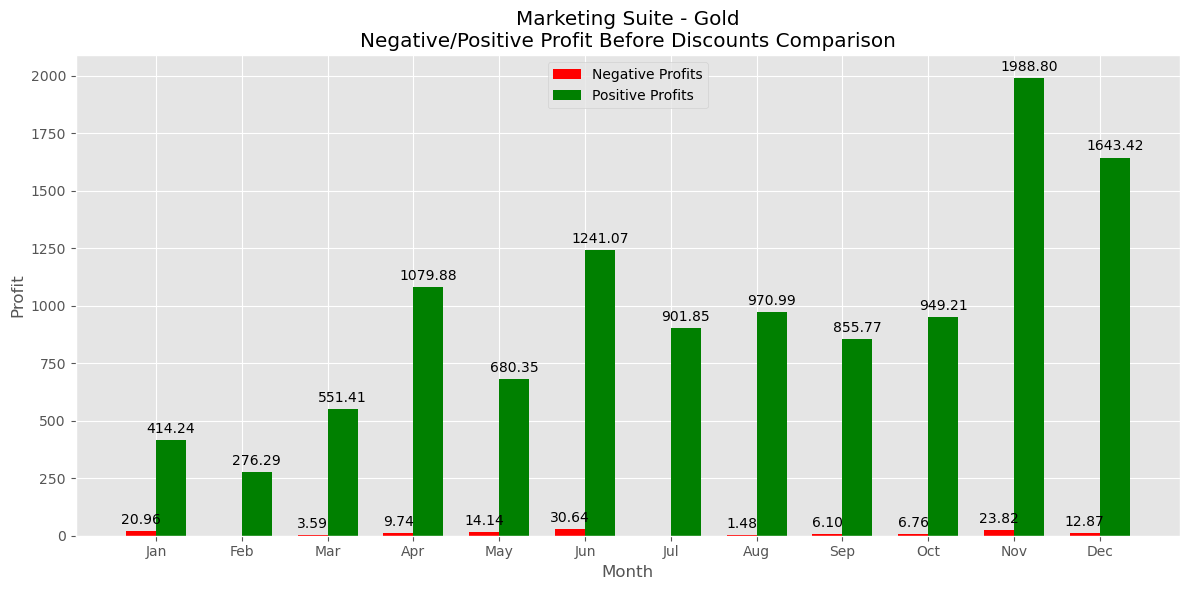

In [25]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(plus_minus['month']))

# Plot negative and positive profits side-by-side
bar1 = plt.bar(index - bar_width/2, plus_minus['negative profits before discount'], bar_width, label='Negative Profits', color='r')
bar2 = plt.bar(index + bar_width/2, plus_minus['positive profits before discount'], bar_width, label='Positive Profits', color='g')

# Annotate bars
for rect in bar1 + bar2:
    height = rect.get_height() 
    plt.annotate(f'{height:.2f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height), 
                 xytext=(0, 3), # 3 points vertical offset 
                 textcoords='offset points', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Marketing Suite - Gold\nNegative/Positive Profit Before Discounts Comparison')
plt.xticks(ticks=np.arange(len(plus_minus)), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.legend(loc='upper center')

# Show plot
plt.tight_layout()
plt.show()

>"Before Discounts" reflects a theoretical scenario assuming sales were made without discounts. This represents a potential profit scenario assuming all sales happened at full price.

**Key findings:**
1. Pre-discounts, Marketing Suite - Gold consistently had positive profits. Negative profits are few and limited in value, with the highest being in June (30.64) and January (20.96).
2. Before discounts, November and December show the highest positive profits, with November at 1988.80 and December at 1643.42. High profits at the the end of the year might indicate year-end activities, holiday season demand, and businesses utilizing remaining budgets.
3. January and February have relatively lower positive profits, compared to other months (414.2399 and 276.2858, respectively). Lower profits at the start of the year might be attributed to businesses and individuals who cut back on spending after the holiday season.

### Discounting EDA

In [28]:
# profits that went negative because of discount + positive profits after discount 
post_discount_negatives = prod4_2023[(prod4_2023['net_profit'] < 0)]
post_discount_positives = prod4_2023[(prod4_2023['net_profit'] > 0)]
# negative profit
negatives2 = post_discount_negatives.groupby('month')['net_profit'].sum().reset_index()
negatives2.columns = ['month', 'negative profits after discount']
# positive profit
positives2 = post_discount_positives.groupby('month')['net_profit'].sum().reset_index()
positives2.columns = ['month', 'positive profits after discount']
# merge
plus_minus2 = pd.merge(negatives2, positives2, on='month', how='outer')
plus_minus2
# turn negative values to positive for easier visuals
plus_minus2['negative profits after discount'] = plus_minus2['negative profits after discount'].abs()
# Sort by month to ensure correct order
plus_minus2 = plus_minus2.sort_values(by='month')

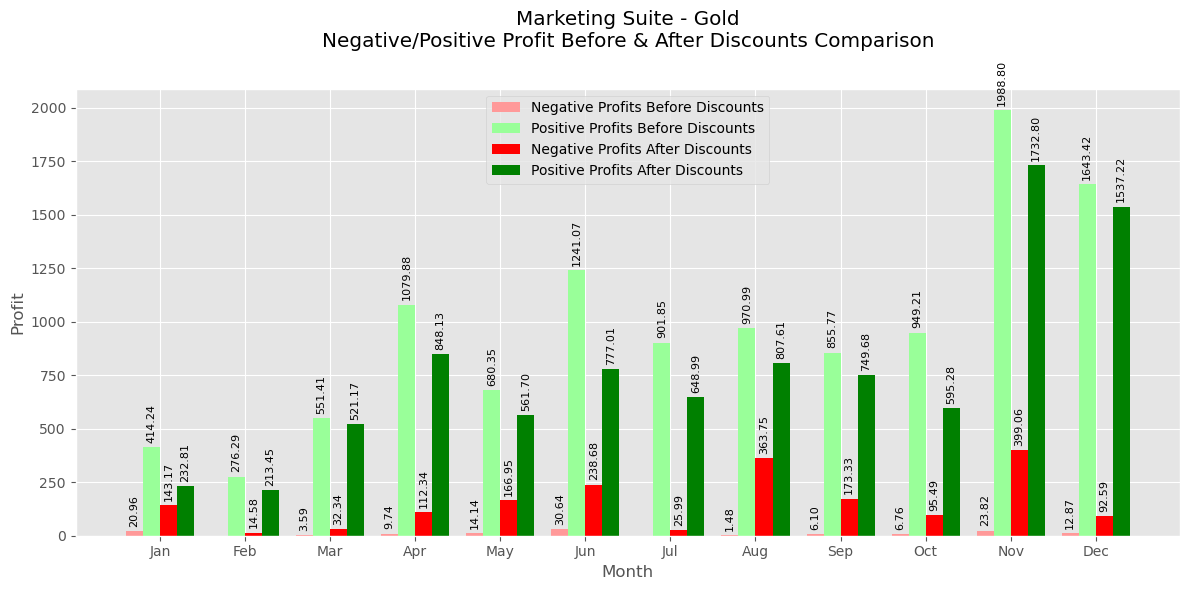

In [29]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(plus_minus['month']))

# Lighter shades of red and green
lighter_green = '#99ff99'
lighter_red = '#ff9999'

# Plot negative and positive profits side-by-side
bar1 = plt.bar(index - bar_width*1.5, plus_minus['negative profits before discount'], bar_width, label='Negative Profits Before Discounts', color=lighter_red)
bar2 = plt.bar(index - bar_width*0.5, plus_minus['positive profits before discount'], bar_width, label='Positive Profits Before Discounts', color=lighter_green)
bar3 = plt.bar(index + bar_width*0.5, plus_minus2['negative profits after discount'], bar_width, label='Negative Profits After Discounts', color='r')
bar4 = plt.bar(index + bar_width*1.5, plus_minus2['positive profits after discount'], bar_width, label='Positive Profits After Discounts', color='g')

# Annotate bars
for rect in bar1 + bar2 + bar3 + bar4:
    height = rect.get_height() 
    plt.annotate(f'{height:.2f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height), 
                 xytext=(0, 3), # 3 points vertical offset 
                 textcoords='offset points', ha='center', va='bottom', fontsize=8, rotation=90)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Marketing Suite - Gold\nNegative/Positive Profit Before & After Discounts Comparison',  pad=30)
plt.xticks(ticks=np.arange(len(plus_minus2)), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.legend(loc='upper center')

# Show plot
plt.tight_layout()
plt.show()

>"After Discounts" reflect actual profit accounting for discounts, showing real-world profit outcomes.

- After discounts, Marketing Suite - Gold still consistently have positive profits. Impact of discounts on both negative and positive profits appears to be balanced across all months.
- November and December remain the most profitable months after discounts, with November at 1333.7486 after discounts (1732.8049 − 399.0563) and December at 1444.6300 (1537.224 − 92.5940), driven by year-end activities and spending.
- January and February remain the lowest profitable months after discounts, thought still retaining positive profit. January have 89.6395 in overall profit and February have 198.8714. Lower values reflects post-holiday slowdowns and initial costs.
- Most months maintain overall positive profits even after discounts, demonstrating the resilience and effective discounting strategy of Marketing Suite - Gold.

In [50]:
discount_month = prod4_2023.query("Discount > 0").groupby(['Customer ID','Month'])[['Discount']].agg('count').reset_index()
prod4_2023_user = prod4_2023_user.merge(discount_month,how='left',on=['Customer ID','Month'])
account_count = prod4_2023.groupby(['Customer ID','Month'])[['Order ID']].count().reset_index()
account_count.columns = ['Customer ID','Month', 'account_cnt']
prod4_2023_user = prod4_2023_user.merge(account_count,how='left',on=['Customer ID','Month'])

In [51]:
discount_report = prod4_2023_user.groupby('Month')[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount' ,'net_profit', 'user','new user','active', 'Discount', 'account_cnt']].agg('sum')
discount_report

,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit,user,new user,active,Discount,account_cnt
Month,,,,,,,,,,
2023-01-01,63.0000,3382.3580,3078.7164,393.2811,89.6395,12,12,12,6.0000,15.0000
2023-02-01,24.0000,1626.9720,1549.5576,276.2858,198.8714,19,7,7,3.0000,7.0000
2023-03-01,68.0000,3815.4520,3756.4616,547.8194,488.8290,33,14,19,6.0000,21.0000
2023-04-01,45.0000,6026.4680,5692.1144,1070.1406,735.7870,42,9,12,9.0000,15.0000
2023-05-01,60.0000,4684.7240,4413.2552,666.2179,394.7491,53,11,15,8.0000,18.0000
2023-06-01,89.0000,6366.6620,5694.5596,1210.4309,538.3285,66,13,22,13.0000,25.0000
2023-07-01,73.0000,4172.0140,3893.1692,901.8474,623.0026,72,6,15,8.0000,17.0000
2023-08-01,90.0000,6241.0700,5715.4140,969.5085,443.8525,77,5,20,8.0000,23.0000
2023-09-01,125.0000,5301.7680,5028.4544,849.6700,576.3564,84,7,34,13.0000,39.0000


In [52]:
prod4_2023_user[['account_cnt']].sum()

account_cnt   289.0000
dtype: float64

In [53]:
prod4_2023_user[['Discount']].sum()

Discount   110.0000
dtype: float64

In [54]:
(119 / 289) * 100

41.17647058823529

- There were 289 invoices for Marketing Suite - Gold in 2023, 110 of which were applied discounts (~41%). With more orders being without discounts, this suggests a strong demand for Marketing Suite - Gold, with customers willing to pay the full price.

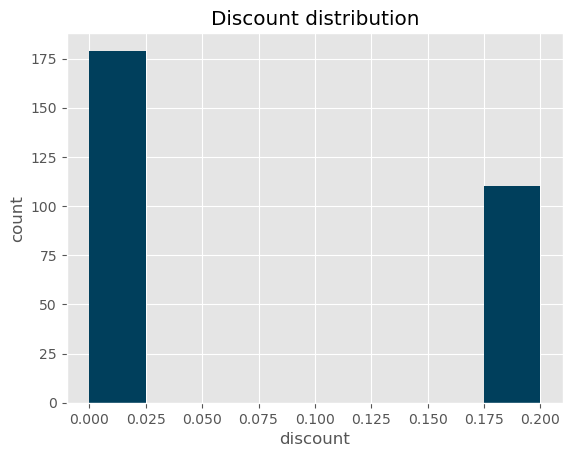

In [56]:
plt.hist(data=prod4_2023,x='Discount',bins=8,color='#003f5c') # distribution of discount
plt.title('Discount distribution')
plt.xlabel('discount')
plt.ylabel('count')
plt.show()

- 110 orders that were discounted are 20% discounts. No other type of discount exist for Marketing Suite - Gold. Since all discounts were consistently 20%, this explains why the impact on profits was balanced. 

In [33]:
# Range of Discounts (January, February, November, December)
filtered_df = prod4_2023[prod4_2023['month'].isin([1, 2, 11, 12])]

# Aggregate statistics
grouped_data = filtered_df.groupby(['month', 'Discount'])[['net_profit']].agg(['std', 'mean', 'min', 'median', lambda x: x.quantile(0.75), 'max', 'count']).rename(columns={'<lambda_0>': '.75'})

# Flatten the multi-level columns for easier handling
grouped_data.columns = ['std', 'mean', 'min', 'median', '75%', 'max', 'count']
grouped_data = grouped_data.reset_index()

# display
grouped_data.set_index(['month', 'Discount'], inplace=True)
grouped_data.sort_index(level=0, inplace=True)
grouped_data

std     mean       min   median     75%      max  count
month Discount                                                             
1     0.0000    19.5774  17.5403    0.6102   9.7176 17.5240  56.3010      9
      0.2000    53.0049 -11.3706 -107.9580   8.2853 24.6217  30.4682      6
2     0.0000    26.5167  44.4389   17.7450  39.4396 50.2439  81.1314      4
      0.2000    24.8324   7.0386   -8.1822  -6.3960 14.6490  35.6940      3
11    0.0000   130.6263  67.6152    0.0000  14.1480 25.0536 473.6106     25
      0.2000    28.6303 -25.4737  -63.0056 -30.4551 -1.7702  30.4990     14
12    0.0000    68.9029  41.4695    0.0000   9.1166 37.8975 290.0058     36
      0.2000    20.7538  -4.8272  -54.5880   2.1495  4.1442  19.8240     10

> Variability (std): Varying standard deviations across months reflect different business contexts and conditions. Each month presents unique challenges and opportunities that affect profit consistency. For instance, the lower standard deviations in other months suggest more stable and predictable profit patterns.

- Profit variability (standard deviation) in the 0% discount range varies by month. November is particularly high at 130.62, and December is also high at 68.9. This may reflect increased sales activities and businesses leveraging their remaining budgets on SaaS tools like Marketing Suite - Gold.
- For the 0% discount range in November and December, minimum profits are 0, with averages (mean, median, 75%) around 50, indicating most profits without discounts aren't very high. Maximum profits are much higher (473.61 for Nov, 290.01 for Dec), suggesting outliers are driving higher profits.
- Across all months, average (mean) profit values for the 20% discount range are all negative. This suggest that on average, a discount of 20% is already too steep for Marketing Suite - Gold, cutting into profits.

**Key findings:**
1. There are 289 orders for Marketing Suite - Gold in 2023, 110 of which were applied discounts (~41%). With more orders being without discounts, this suggests a strong demand for Marketing Suite - Gold, with customers willing to pay the full price.
2. November and December remain the most profitable months after discounts, with November at 1333.7486 and December at 1444.6300, driven by year-end activities and spending.
3. January and February remain the lowest profitable months after discounts, thought still retaining positive profit. January have 89.6395 in overall profit and February have 198.8714. Lower values reflects post-holiday slowdowns and initial costs.
4. Discounted orders are all 20% discounts. Since all discounts were consistently 20%, impact of discounts on both negative and positive profits appears to be balanced across all months.
5. For the 0% discount range in November and December, minimum profits are 0, with averages (mean, median, 75%) around 50, indicating most profits without discounts aren't very high. Maximum profits are much higher (473.61 for Nov, 290.01 for Dec), suggesting outliers are driving higher profits.
6. Across all months, average (mean) profit values for the 20% discount range are all negative. This suggest that on average, a discount of 20% is already too steep for Marketing Suite - Gold, cutting into profits.

### Segmentation EDA

In [7]:
# make a segment df, from the product df
prod4_2023_segment = prod4_2023.groupby(['Segment'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
segment_account = prod4_2023.groupby(['Segment'])[['Order ID']].nunique().reset_index()
segment_account.columns = ['Segment','account']
prod4_2023_percents = segment_account.merge(prod4_2023_segment,how='left',on=['Segment'])
prod4_2023_percents

,Segment,account,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,Enterprise,58,244,17112.0800,16322.1760,2679.4100,1889.5060
1,SMB,130,458,23490.3280,21722.3344,3333.5978,1565.6042
2,Strategic,82,324,29231.7220,27734.0276,5410.1697,3912.4753


In [8]:
# calculate percentage of segment's business share by category
prod4_2023_percents['% Account']= prod4_2023_percents['account'] / prod4_2023_percents['account'].sum() *100
prod4_2023_percents['% Quantity']= prod4_2023_percents['Quantity'] / prod4_2023_percents['Quantity'].sum() *100
prod4_2023_percents['% Sales']= prod4_2023_percents['Sales'] / prod4_2023_percents['Sales'].sum() *100
prod4_2023_percents['% Net Revenue']= prod4_2023_percents['discounted_sales'] / prod4_2023_percents['discounted_sales'].sum() *100  
percents_plot = prod4_2023_percents.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_plot = percents_plot.melt(id_vars='Segment', var_name='Business_Share', value_name='Percent')
percents_plot = percents_plot.groupby(['Segment', 'Business_Share'])['Percent'].sum()
percents_plot = percents_plot.unstack('Segment')
prod4_plot = percents_plot.columns.tolist()

Text(0, 0.5, 'Percent')

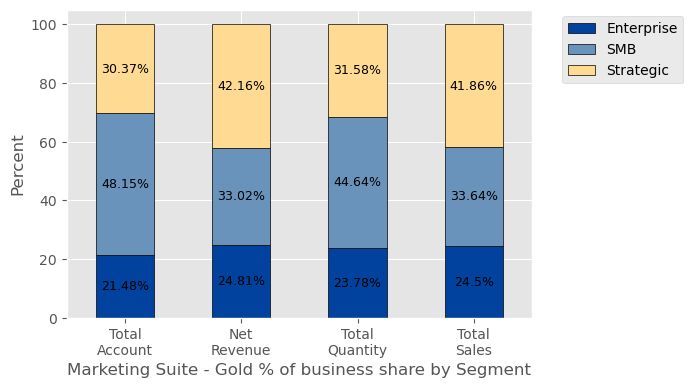

In [35]:
# Segments of Business Share
fig, ax = plt.subplots(figsize = (6, 4))

percents_plot[prod4_plot].plot(kind='bar', ax = ax, stacked=True, color=['#00429d', '#6a93bc', '#ffda93'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('Marketing Suite - Gold % of business share by Segment')
plt.ylabel('Percent')

- In this chart, Customer accounts, quantity of product purchases, sales, and revenue (sales after discounts are applied) for the "Marketing Suite - Gold" product in 2023 are summed and calculated into percentages based on 3 customer segmentation categories: Enterprise, SMB, and Strategic. The goal for this is to somewhat "map" the ideal customer profile (looking for underperforming segments, etc) for Marketing Suite - Gold based on the last year of company activity.
- We can see that despite having 30.37%% of the total accounts, the Strategic segment contribute the highest Net Revenue (42.16%) and Total Sales (41.86%).

([0, 1, 2],
 [Text(0, 0, 'Enterprise'), Text(1, 0, 'SMB'), Text(2, 0, 'Strategic')])

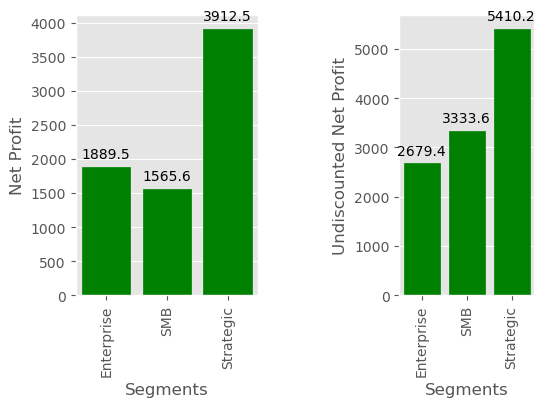

In [36]:
# Marketing Suite - Gold net profit by Segment vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 3, 1)
net_profit_plot = sns.barplot(x='Segment', y='net_profit', data=prod4_2023_segment)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Segments')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 4, 3)
undiscounted_plot = sns.barplot(x='Segment', y='(net)_profit_before_discount', data=prod4_2023_segment)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Segments')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Strategic segment achieves the highest Net Profit (3912.5) and Undiscounted Net Profit (5410.2).
- SMB Segment contributes significantly to Net Profit (1565.6) and Undiscounted Net Profit (3333.6).
- Enterprise contributes positively with a Net Profit (1889.5) and Undiscounted Net Profit (2679.4).

Strategic segment stands out as the highest-performing segment for the Marketing Suite - Gold product, leading in Net Revenue (42.16%) and Total Sales (41.86%), and achieving the highest Net Profit (3912.5) and Undiscounted Net Profit (5410.2). The SMB segment, while having the largest share of Total Accounts (48.15%) and Total Quantity (44.64%), also shows strong financial health with significant net profits. The Enterprise segment, although contributing less compared to the other segments, still shows positive financial contributions.

### Further Inquiries on Segments -----------

In [16]:
# Copy-pasted code for Industry queries within segment
# Industries using Marketing Suite - Gold within the SMB Segment
prod4_2023_industry_SMB = prod4_2023.query("Segment == 'SMB'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
SMB_account = prod4_2023.query("Segment == 'SMB'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
SMB_account.columns = ['Industry','account']
prod4_2023_percents_SMB = SMB_account.merge(prod4_2023_industry_SMB,how='left',on=['Industry'])
prod4_2023_percents_SMB['% Account']= prod4_2023_percents_SMB['account'] / prod4_2023_percents_SMB['account'].sum() *100
prod4_2023_percents_SMB['% Quantity']= prod4_2023_percents_SMB['Quantity'] / prod4_2023_percents_SMB['Quantity'].sum() *100
prod4_2023_percents_SMB['% Sales']= prod4_2023_percents_SMB['Sales'] / prod4_2023_percents_SMB['Sales'].sum() *100
prod4_2023_percents_SMB['% Net Revenue']= prod4_2023_percents_SMB['discounted_sales'] / prod4_2023_percents_SMB['discounted_sales'].sum() *100  
percents_SMB = prod4_2023_percents_SMB.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_SMB = percents_SMB.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_SMB = percents_SMB.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_SMB = percents_SMB.unstack('Industry')
prod4_SMB = percents_SMB.columns.tolist()
# Industries using Marketing Suite - Gold within the Strategic Segment
prod4_2023_industry_Strategic = prod4_2023.query("Segment == 'Strategic'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
Strategic_account = prod4_2023.query("Segment == 'Strategic'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
Strategic_account.columns = ['Industry','account']
prod4_2023_percents_Strategic = Strategic_account.merge(prod4_2023_industry_Strategic,how='left',on=['Industry'])
prod4_2023_percents_Strategic['% Account']= prod4_2023_percents_Strategic['account'] / prod4_2023_percents_Strategic['account'].sum() *100
prod4_2023_percents_Strategic['% Quantity']= prod4_2023_percents_Strategic['Quantity'] / prod4_2023_percents_Strategic['Quantity'].sum() *100
prod4_2023_percents_Strategic['% Sales']= prod4_2023_percents_Strategic['Sales'] / prod4_2023_percents_Strategic['Sales'].sum() *100
prod4_2023_percents_Strategic['% Net Revenue']= prod4_2023_percents_Strategic['discounted_sales'] / prod4_2023_percents_Strategic['discounted_sales'].sum() *100  
percents_Strategic = prod4_2023_percents_Strategic.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_Strategic = percents_Strategic.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_Strategic = percents_Strategic.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_Strategic = percents_Strategic.unstack('Industry')
prod4_Strategic = percents_Strategic.columns.tolist()
# Industries using Marketing Suite - Gold within the Enterprise Segment
prod4_2023_industry_Enterprise = prod4_2023.query("Segment == 'Enterprise'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
Enterprise_account = prod4_2023.query("Segment == 'Enterprise'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
Enterprise_account.columns = ['Industry','account']
prod4_2023_percents_Enterprise = Enterprise_account.merge(prod4_2023_industry_Enterprise,how='left',on=['Industry'])
prod4_2023_percents_Enterprise['% Account']= prod4_2023_percents_Enterprise['account'] / prod4_2023_percents_Enterprise['account'].sum() *100
prod4_2023_percents_Enterprise['% Quantity']= prod4_2023_percents_Enterprise['Quantity'] / prod4_2023_percents_Enterprise['Quantity'].sum() *100
prod4_2023_percents_Enterprise['% Sales']= prod4_2023_percents_Enterprise['Sales'] / prod4_2023_percents_Enterprise['Sales'].sum() *100
prod4_2023_percents_Enterprise['% Net Revenue']= prod4_2023_percents_Enterprise['discounted_sales'] / prod4_2023_percents_Enterprise['discounted_sales'].sum() *100  
percents_Enterprise = prod4_2023_percents_Enterprise.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_Enterprise = percents_Enterprise.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_Enterprise = percents_Enterprise.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_Enterprise = percents_Enterprise.unstack('Industry')
prod4_Enterprise = percents_Enterprise.columns.tolist()

##### SMB Segment Notes

Text(0, 0.5, 'Percent')

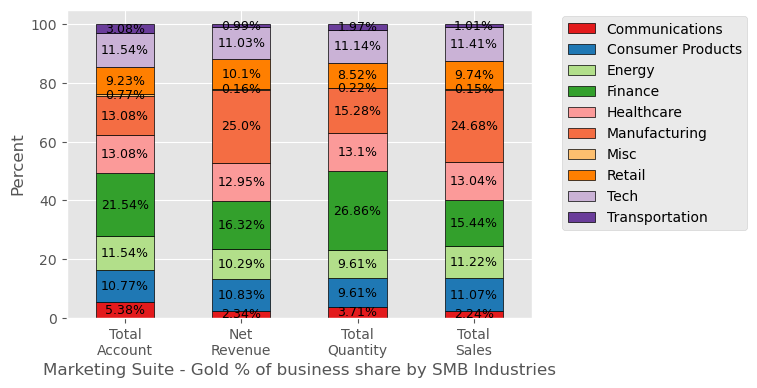

In [38]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_SMB[prod4_SMB].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('Marketing Suite - Gold % of business share by SMB Industries')
plt.ylabel('Percent')

- Manufacturing contributes highest in Net Revenue (25%) and Total Sales (24.86), despite having only 13.08% in Total Accounts.
- Finance industry dominates in Total Accounts (21.54%) and Total Quantity (26.86%).
- Energy, Healthcare and Tech have notable shares in Net Revenue, Total Quantity, and Total Sales.
- Retail and Consumer Products have moderate percentages across the categories.
- Communications, Transportation , and Miscellaneous have the lowest percentages across most categories.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Misc'),
  Text(7, 0, 'Retail'),
  Text(8, 0, 'Tech'),
  Text(9, 0, 'Transportation')])

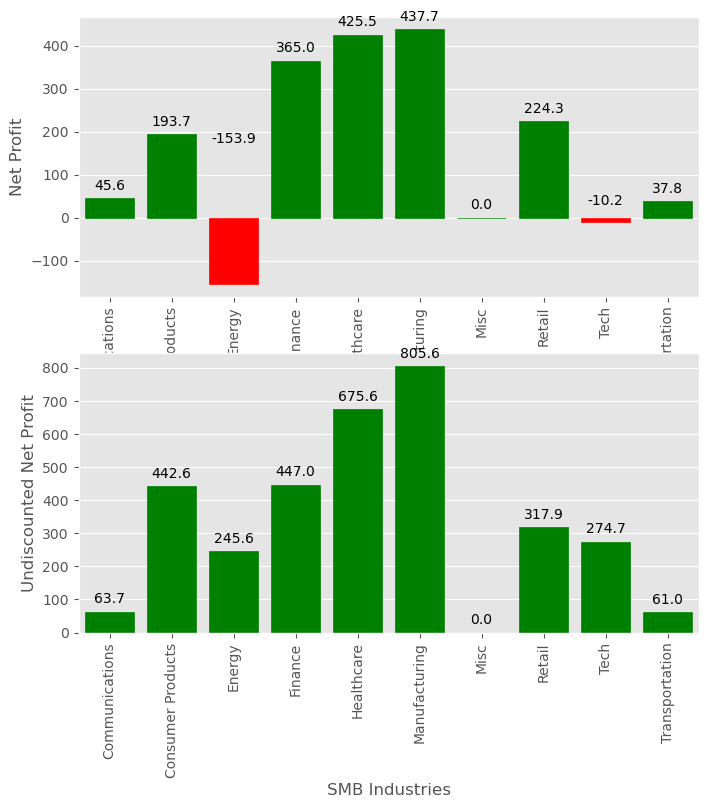

In [39]:
# Marketing Suite - Gold net profit by SMB Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod4_2023_industry_SMB)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('SMB Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod4_2023_industry_SMB)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('SMB Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Manufacturing contributes the highest in both Net Profit (437.7) and Undiscounted Net Profit (805.6).
- Healthcare and Finance industries also show strong financial performance with significant net profits (425.5 and 365.0) and undiscounted net profits (675.6 and 447.0).
- Retail and Consumer Products contribute positively with moderate net profits (224.3 and 193.7) and higher undiscounted net profits (317.9 and 442.6).
- Communications and Transportation show lower yet positive financial contributions.
- Energy and Tech industries have negative or very low net profits, indicating weaker performance within the SMB segment.
- Miscellaneous industry shows zero net profit.

Manufacturing leads in the SMB segment for the Marketing Suite - Gold with the highest Net Profit (437.7) and Undiscounted Net Profit (805.6), despite holding only 13.08% of Total Accounts. Finance shows strong performance with the highest Total Accounts (21.54%) and Total Quantity (26.86%). Healthcare and Tech contribute significantly to Net Revenue and sales, with Healthcare achieving notable profits. Retail and Consumer Products also contribute positively with moderate net profits. Communications and Transportation make lower but positive contributions. Energy and Tech face challenges with weaker financial performance.

##### Strategic Segment Notes

Text(0, 0.5, 'Percent')

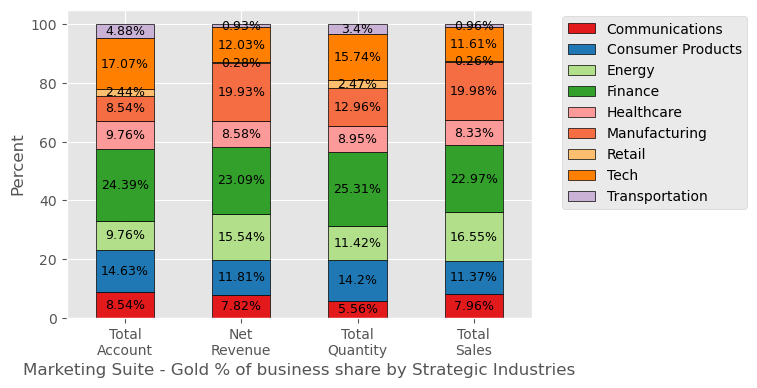

In [40]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_Strategic[prod4_Strategic].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('Marketing Suite - Gold % of business share by Strategic Industries')
plt.ylabel('Percent')

- Manufacturing contributes significantly in Net Revenue (19.93%) and Total Sales (19.98%), despite only having 17.07% in Total Accounts.
- Finance industry dominates in Total Accounts (24.39%) and Total Quantity (25.31%), and has a strong share in Net Revenue (23.09%) and Total Sales (22.97%).
- Energy and Tech industries have notable shares in Net Revenue, Total Quantity, and Total Sales.
- Consumer Products and Healthcare have moderate percentages across the categories.
- Retail and Transportation have the lowest percentages across most categories.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Retail'),
  Text(7, 0, 'Tech'),
  Text(8, 0, 'Transportation')])

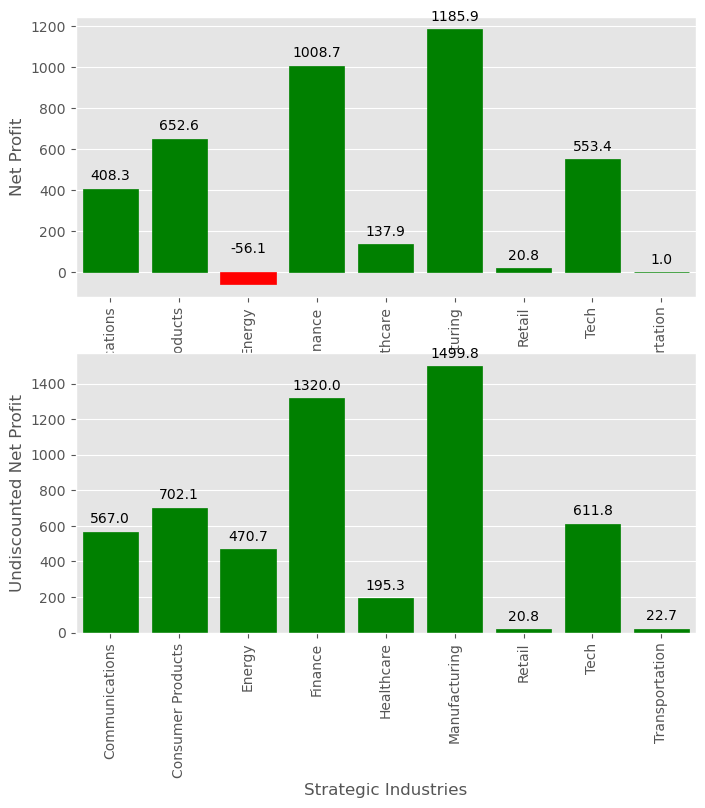

In [41]:
# Marketing Suite - Gold net profit by Strategic Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod4_2023_industry_Strategic)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Strategic Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod4_2023_industry_Strategic)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Strategic Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Manufacturing contributes highest in both Net Profit (1220.3) and Undiscounted Net Profit (1499.8).
- Finance industry shows strong financial performance with significant Net Profit (1008.7) and Undiscounted Net Profit (1320).
- Consumer Products industry achieves significant Net Profit (652.6) and Undiscounted Net Profit (702.1).
- Tech and Communications contribute positively with moderate net profits (553.4 and 408.3) and undiscounted net profits (611.8 and 567).
- Healthcare show lower yet positive financial contributions, with net profits (137.9) and undiscounted net profits (195.3).
- Energy industry exhibits weaker performance with a negative net profit (-56.1), but a positive undiscounted net profit (470.7), indicating potential issues with discounts or costs.
- Transportation & Retail show almost 0 net profit, indicating weaker performance within the Strategic segment.

Manufacturing leads with the highest Net Profit (1,220.3) and Undiscounted Net Profit (1,499.8). Finance dominates Total Accounts (24.39%) and Total Quantity (25.31%), showing strong profits (1,008.7). Tech shows moderate profits (553.4), while Energy struggles with a negative net profit (-56.1). Consumer Products and Communications contribute positively. Healthcare shows lower positive contributions. Retail and Transportation have almost zero net profit, indicating weaker performance.

##### Enterprise Segment Notes

Text(0, 0.5, 'Percent')

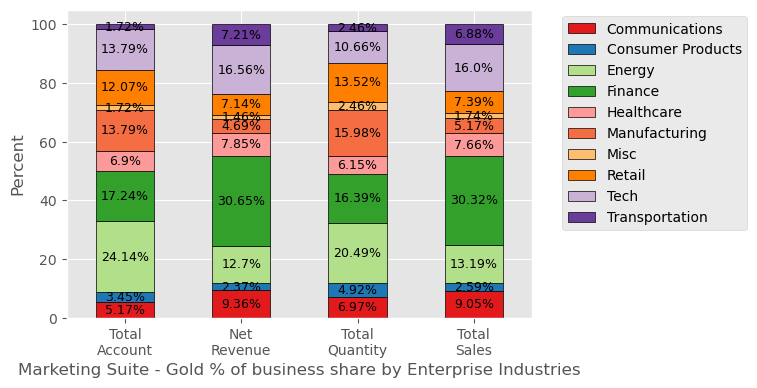

In [42]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_Enterprise[prod4_Enterprise].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('Marketing Suite - Gold % of business share by Enterprise Industries')
plt.ylabel('Percent')

- Finance industry leads in Net Revenue (30.65%) and Total Sales (30.32%), with a significant share in Total Accounts (17.24%).
- Energy industry has the highest share in Total Accounts (24.14%) and contributes notably in Net Revenue (12.70%) and Total Sales (13.19%).
- Tech industry shows strong contributions in Net Revenue (16.56%) and Total Sales (16.00%).
- Manufacturing and Healthcare have substantial percentages in Total Quantity (15.98%) and Total Sales (7.66%).
- Communications industry shows notable shares in Net Revenue (9.36%) and Total Sales (9.05%).
- Retail and Consumer Products have moderate percentages across most categories.
- Miscellaneous and Transportation have the lowest percentages across most categories.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Misc'),
  Text(7, 0, 'Retail'),
  Text(8, 0, 'Tech'),
  Text(9, 0, 'Transportation')])

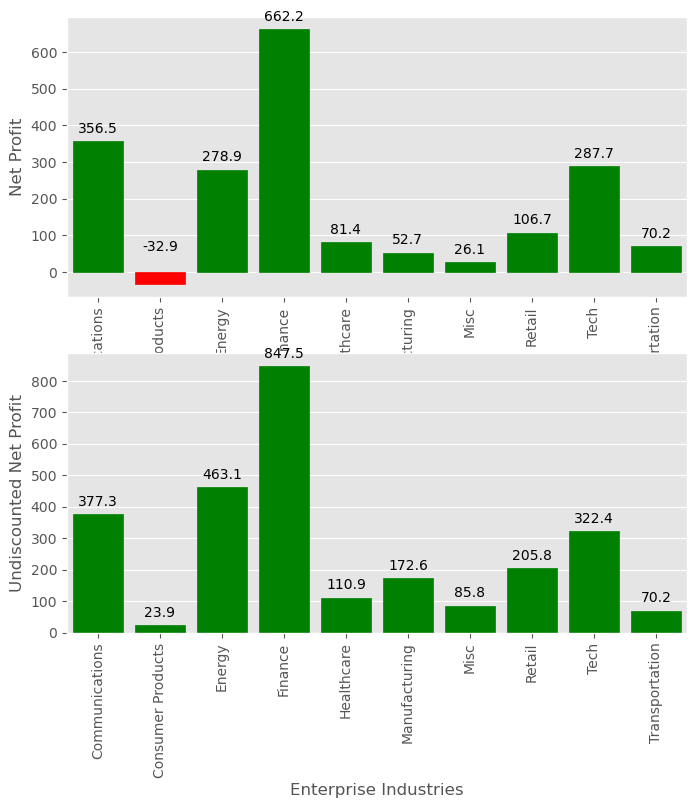

In [43]:
# Marketing Suite - Gold net profit by Enterprise Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod4_2023_industry_Enterprise)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Enterprise Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod4_2023_industry_Enterprise)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Enterprise Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Finance industry leads in Net Profit Before Discount (847.482) and Net Profit (662.1828)
- Energy industry follows with significant Net Profit Before Discount (463.0662) and Net Profit (278.8822).
- Tech industry also shows substantial Net Profit Before Discount (322.3835) and Net Profit (287.7211).
- Communications has notable contributions with Net Profit Before Discount (377.289) and Net Profit (356.505).
- Retail and Healthcare have moderate Net Profit Before Discount (205.7515 and 110.8613) and Net Profit (106.6731 and 81.4245), respectively.
- Manufacturing, Miscellaneous, and Transportation show lower yet positive net profits.
- Consumer Products exhibits a negative net profit (-32.8628), indicating weaker performance within the Enterprise segment.

Finance leads with the highest Net Revenue (30.65%) and Total Sales (30.32%), achieving a Net Profit Before Discount of 847.482 and a Net Profit of 662.1828. Energy follows with notable contributions and significant Net Profits (463.0662 before discount, 278.8822 after). Tech shows strong contributions, achieving substantial Net Profits (322.3835 before discount, 287.7211 after). Communications contributes positively with Net Profits (377.289 before discount, 356.505 after). Retail and Healthcare exhibit stable financial contributions. Manufacturing, Miscellaneous, and Transportation display positive net profits. Consumer Products faces challenges with a negative Net Profit (-32.8628).

1. Strategic segment is the top priority, driving 42.16% of net revenue and 41.86% of sales, with a net profit of 3,912.48. The Enterprise segment, contributing 24.81% of net revenue and 24.50% of sales, with a net profit of 1,889.51, also plays a significant role. SMB follows closely with 33.02% of net revenue and 33.64% of sales, with a net profit of 1,565.60. Focus on improving the Strategic segment, while giving secondary consideration to Enterprise and SMB segments.

### Regional EDA

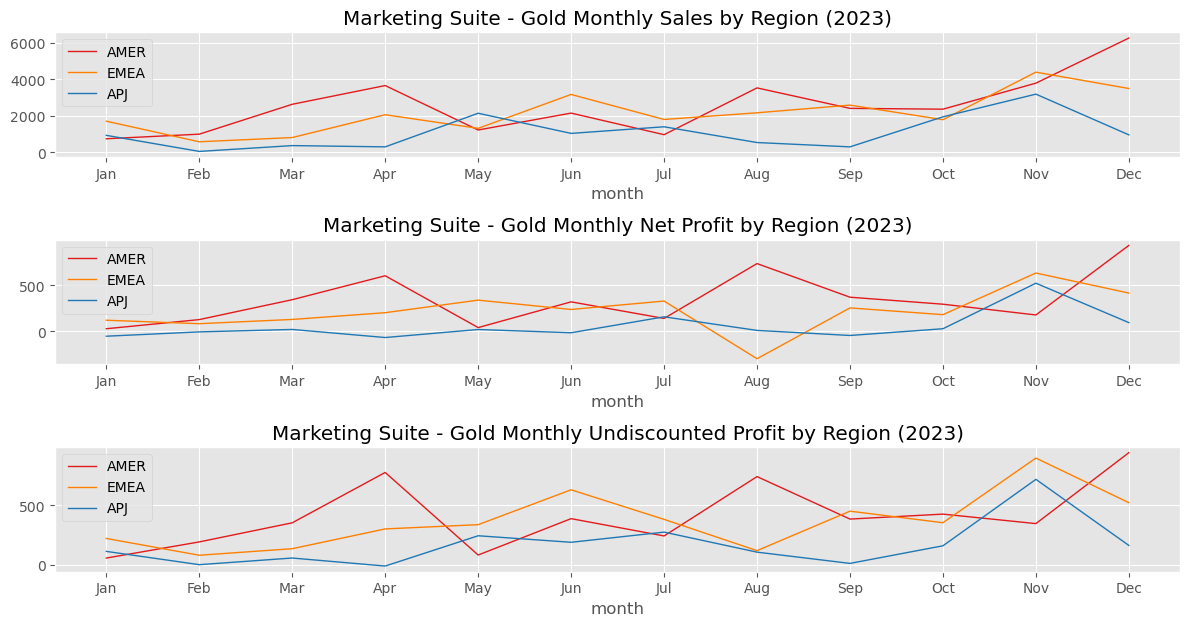

In [7]:
# Marketing Suite - Gold Monthly Income EDA by Region (2023)
prod4_region_month = prod4_2023.groupby(['Region','month'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
plt.figure(figsize=(12,8))

plt.subplot(411)
prod4_region_month.query("Region == 'AMER'").groupby('month')['Sales'].sum().plot(c='#e31a1c',linewidth=1)
prod4_region_month.query("Region == 'EMEA'").groupby('month')['Sales'].sum().plot(c='#ff7f00',linewidth=1)
prod4_region_month.query("Region == 'APJ'").groupby('month')['Sales'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('Marketing Suite - Gold Monthly Sales by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])

plt.subplot(412)
prod4_region_month.query("Region == 'AMER'").groupby('month')['net_profit'].sum().plot(c='#e31a1c',linewidth=1)
prod4_region_month.query("Region == 'EMEA'").groupby('month')['net_profit'].sum().plot(c='#ff7f00',linewidth=1)
prod4_region_month.query("Region == 'APJ'").groupby('month')['net_profit'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('Marketing Suite - Gold Monthly Net Profit by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])

plt.subplot(413)
prod4_region_month.query("Region == 'AMER'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#e31a1c',linewidth=1)
prod4_region_month.query("Region == 'EMEA'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#ff7f00',linewidth=1)
prod4_region_month.query("Region == 'APJ'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('Marketing Suite - Gold Monthly Undiscounted Profit by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])


plt.tight_layout()
plt.show()

Monthly Regional Performance

Sales vary by region and month, with EMEA leading in January, June, and November. AMER performs strongly in March, April, August, and December, while APJ maintains lower, more consistent sales. Discounts notably affect net profits in several months, particularly in the APJ and EMEA regions.
- AMER region exhibits strong performance in sales and net profit in December, April, and August. Discounts have a significant impact on profits in April, July, October, and November, leading to lower net profits in these months.
- EMEA region shows strong sales and net profit performance in January, November, and December. However, significant discounts in certain months, such as August and September, have led to negative net profits.
- APJ region shows the strongest sales in May, November, and October. However, significant discounts in certain months, such as January, April, and September, have led to negative net profits.

Performance Highlights
- Highest Sales: In AMER, December shows the highest sales of 6268.91.
- Highest Net Profit: The highest net profit is seen in AMER, December, with a net profit of 936.14.
- Highest Undiscounted Profit: AMER in December also shows the highest undiscounted profit at 943.59.

In [14]:
prod4_region_month

,Region,month,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,AMER,1,23,743.5520,712.2496,57.4762,26.1738
1,AMER,2,18,997.1100,929.7660,193.2662,125.9222
2,AMER,3,27,2634.6940,2623.8492,353.8948,343.0500
3,AMER,4,14,3662.7920,3489.7296,777.3496,604.2872
4,AMER,5,19,1225.2240,1181.0192,82.9692,38.7644
5,AMER,6,46,2152.1280,2082.7984,388.8895,319.5599
6,AMER,7,28,967.6760,862.9128,243.3640,138.6008
7,AMER,8,50,3534.3560,3529.2168,742.4684,737.3292
8,AMER,9,52,2411.9560,2397.0488,385.2543,370.3471
9,AMER,10,13,2366.7480,2233.6664,427.0326,293.9510


([0, 1, 2], [Text(0, 0, 'AMER'), Text(1, 0, 'APJ'), Text(2, 0, 'EMEA')])

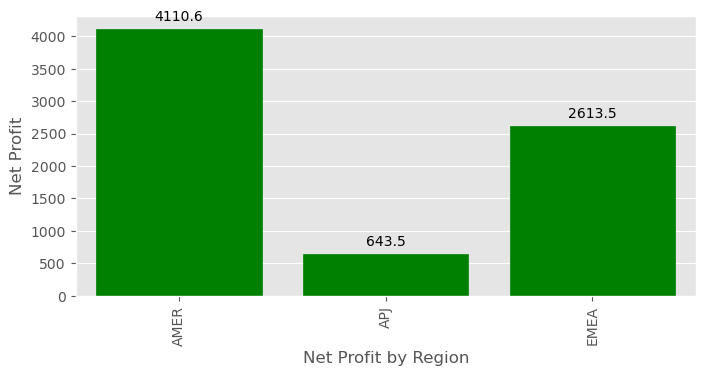

In [15]:
prod4_region = prod4_2023.groupby(['Region'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Region', y='net_profit', data=prod4_region)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Net Profit by Region')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

In [16]:
prod4_region 

,Region,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,AMER,427,30759.5500,29927.2860,4942.8230,4110.5590
1,APJ,212,13170.7600,11776.7920,2037.4900,643.5220
2,EMEA,387,25903.8200,24074.4600,4442.8645,2613.5045


High-Performing Region
- AMER region leads in both sales and net profit, demonstrating strong overall performance.
- AMER experiences fluctuations in sales and profits, impacting revenue stability and financial planning.

Mixed Performance
- EMEA region shows positive sales and net profit in total.
- EMEA faces significant challenges with discounts leading to negative net profits in months like August and September.

Challenging Region
- APJ region have the lowest sales and net profit, but still manages to contributes positively.
- APJ frequently encounters negative net profits due to discounts in months such as January, April, and September. Lower sales volume compared to other regions further impacts overall revenue.

In [9]:
grouped = prod4_2023.groupby(['Region', 'Segment', 'Industry'])
total_sales = grouped['Sales'].sum()
total_profit_before_discounts = grouped['(net)_profit_before_discount'].sum()
total_profit = grouped['net_profit'].sum()
avg_sales_per_order = grouped['Sales'].mean()
avg_discount = grouped['Discount'].mean()
profit_margin = (total_profit / total_sales) * 100

In [10]:
metrics = pd.DataFrame({
    'total_sales': total_sales,
    'avg_sales_per_order': avg_sales_per_order,
    'total_profit': total_profit,
    'total_profit before discounts':total_profit_before_discounts,
    'avg_discount': avg_discount,
    'profit_margin': profit_margin
}).reset_index()

metrics_sorted = metrics.sort_values(by=['Region', 'Segment', 'Industry'])

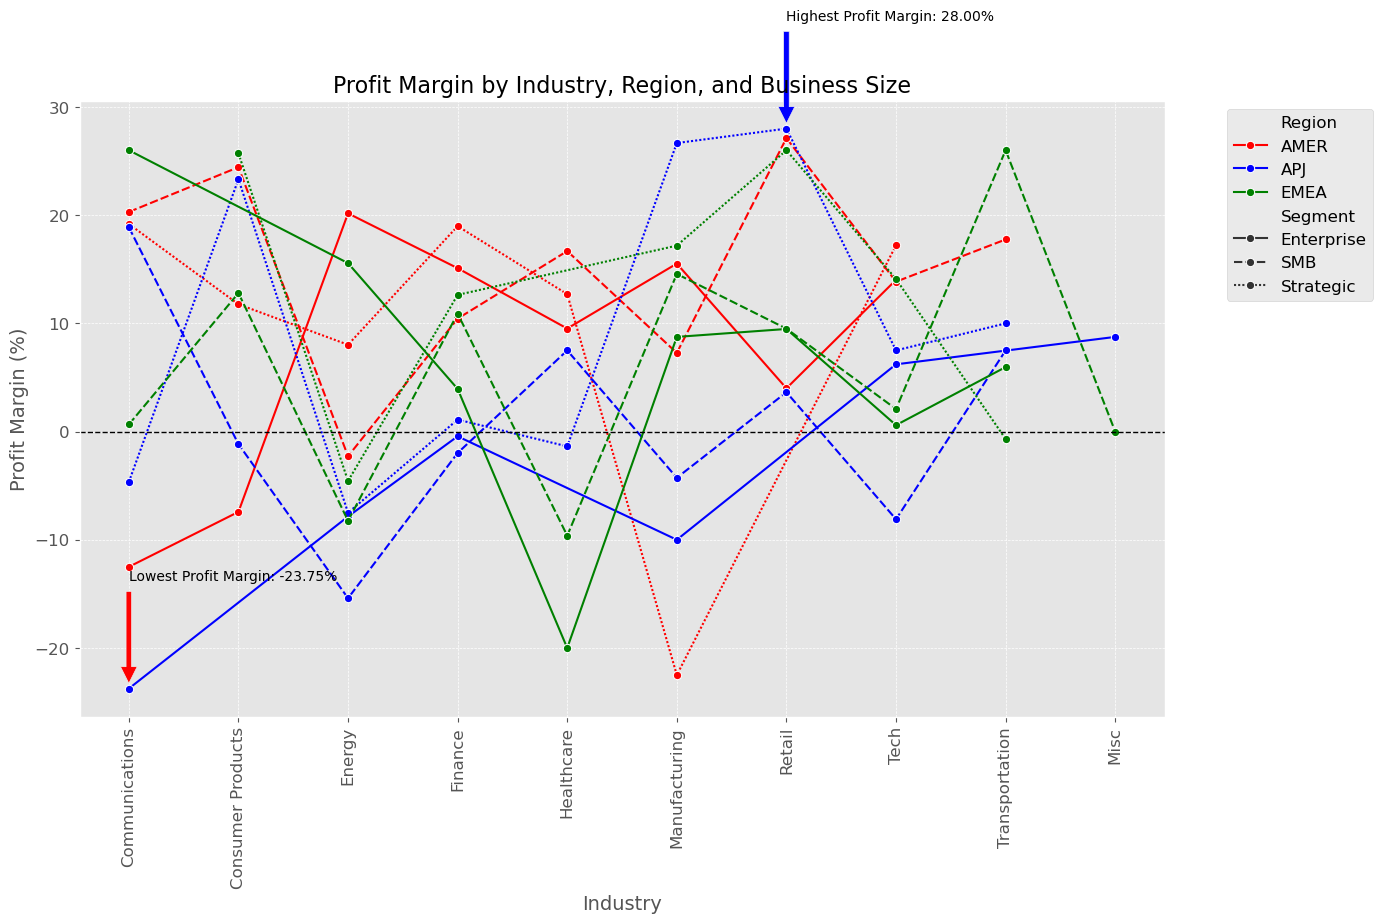

In [11]:
# Cross-segment line chart

# Define the color palette
palette = {
    'AMER': 'red',
    'EMEA': 'green',
    'APJ': 'blue'
}

plt.figure(figsize=(14, 8))
sns.lineplot(data=metrics_sorted, x='Industry', y='profit_margin', hue='Region', style='Segment', marker='o', palette=palette)
plt.title('Profit Margin by Industry, Region, and Business Size', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Profit Margin (%)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)

# Add a black grid line at y=0
plt.axhline(0, color='black', linewidth=1, linestyle='--')

# Highlight highest and lowest profit margins
max_profit = metrics_sorted['profit_margin'].max()
min_profit = metrics_sorted['profit_margin'].min()
max_profit_industry = metrics_sorted.loc[metrics_sorted['profit_margin'] == max_profit, 'Industry'].values[0]
min_profit_industry = metrics_sorted.loc[metrics_sorted['profit_margin'] == min_profit, 'Industry'].values[0]

plt.annotate(
    f'Highest Profit Margin: {max_profit:.2f}%', 
    xy=(max_profit_industry, max_profit), 
    xytext=(max_profit_industry, max_profit + 10), 
    arrowprops=dict(facecolor='blue', shrink=0.05)
)

plt.annotate(
    f'Lowest Profit Margin: {min_profit:.2f}%', 
    xy=(min_profit_industry, min_profit), 
    xytext=(min_profit_industry, min_profit + 10), 
    arrowprops=dict(facecolor='red', shrink=0.05)
)

# Move legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


In [12]:
# Calculating the total profit for each group
total_profit = grouped['net_profit'].sum()
avg_discount = grouped['Discount'].mean()
# Creating a DataFrame to store the metrics
metrics = pd.DataFrame({
    'total_profit': total_profit,
    'avg_discount': avg_discount
}).reset_index()
# Filtering the metrics to show only the positive profits
positive_profit_metrics = metrics[metrics['total_profit'] > 0]
# Sorting the metrics DataFrame by Region, Segment, and Industry
metrics_sorted = positive_profit_metrics.sort_values(by=['Region', 'Segment', 'Industry'])

#### Cross-segment SMB

In [13]:
###Filter positive profits (SMB)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the SMB segment
smb_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'SMB')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
smb_positive_profit_metrics = smb_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

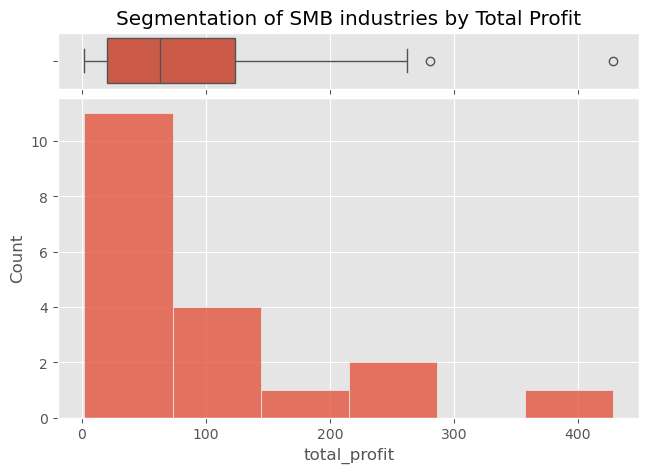

0.0000     1.9620
0.2500    20.1065
0.5000    62.9233
0.7500   123.5338
1.0000   428.0234
Name: total_profit, dtype: float64
Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 141.00 in profit
- 3 (Good) : Contributes between 123.53 and 141.00 in profit
- 2 (Marginal) : Contributes between 62.92 and 123.53 in profit
- 1 (Underperforming) : Contributes less than 62.92 in profit


In [ ]:
# Define custom thresholds for segmentation
custom_bins = [0, 62.92, 123.53, 141, 428.0234]
custom_labels = [1, 2, 3, 4]

# Apply custom segmentation
smb_positive_profit_metrics['segmentation score'] = pd.cut(
    smb_positive_profit_metrics['total_profit'],
    bins=custom_bins,
    labels=custom_labels,
    include_lowest=True
).astype(int)

# Plotting
fig, (ax_top, ax_bot) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(7.5, 5),
    gridspec_kw={
        'height_ratios': (0.15, 0.85),
        'hspace': 0.05
    }
)

sns.boxplot(data=smb_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=smb_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of SMB industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = smb_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {custom_bins[3]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {custom_bins[2]:.2f} and {custom_bins[3]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {custom_bins[1]:.2f} and {custom_bins[2]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {custom_bins[1]:.2f} in profit")

In [37]:
# Define custom quantile ranges for segmentation
custom_bins = [0, 62.92, 123.53, 141, smb_positive_profit_metrics['total_profit'].max()]

# Manually set the segmentation scores
smb_positive_profit_metrics['segmentation score'] = pd.cut(
    smb_positive_profit_metrics['total_profit'],
    bins=custom_bins,
    labels=[1, 2, 3, 4],
    include_lowest=True
).astype(int)

smb_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
12,AMER,SMB,Healthcare,428.0234,0.0714,4
61,EMEA,SMB,Manufacturing,280.2321,0.0667,4
59,EMEA,SMB,Finance,262.1961,0.0333,4
13,AMER,SMB,Manufacturing,203.3871,0.0333,4
63,EMEA,SMB,Retail,140.3051,0.0571,3
11,AMER,SMB,Finance,106.7625,0.0167,2
57,EMEA,SMB,Consumer Products,105.9612,0.1200,2
9,AMER,SMB,Consumer Products,103.3597,0.0000,2
15,AMER,SMB,Tech,67.7009,0.0500,2
14,AMER,SMB,Retail,62.9233,0.0000,2


In [41]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = smb_positive_profit_metrics[smb_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the SMB segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "maintain solid profitability.\nWhile not the highest-performing, this SMB industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese SMB industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")


Healthcare in AMER, Manufacturing in EMEA, Finance in EMEA, Manufacturing in AMER are the highest performing industries in the SMB segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Retail in EMEA maintain solid profitability.
While not the highest-performing, this SMB industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution to ensure that profitability is not compromised.

Finance in AMER, Consumer Products in EMEA, Consumer Products in AMER, Tech in AMER, Retail in AMER, Communications in APJ, Transportation in AMER, Retail in APJ, Tech in EMEA, Healthcare in APJ, Communications in AMER, Transportation in EMEA, Transportation in APJ, Communications in EMEA are underperforming.
These SMB industries struggle with profitability and should be approached with caution.
Strategies should focus on i

In [42]:
###Filter negative profits (SMB)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the SMB segment
smb_negative_profit_metrics = metrics[(metrics['total_profit'] < 0) & (metrics['Segment'] == 'SMB')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
smb_negative_profit_metrics = smb_negative_profit_metrics.sort_values(by='total_profit', ascending=True)

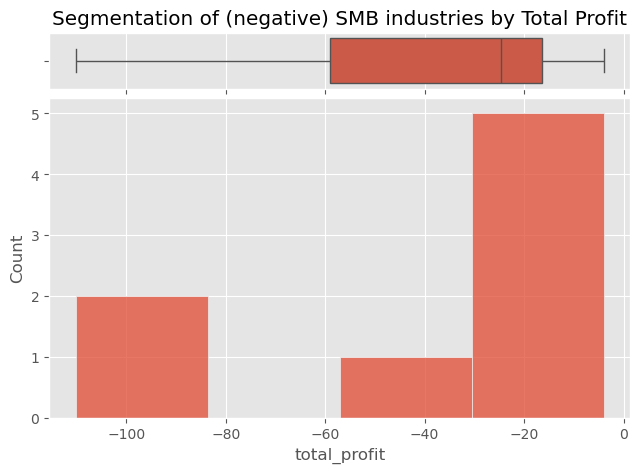

0.0000   -110.1854
0.2500    -59.0300
0.5000    -24.7205
0.7500    -16.3380
1.0000     -3.9450
Name: total_profit, dtype: float64
Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :
- 4 (Severe) : Loses more than -59.03 in profit
- 3 (Significant) : Loses between -59.03 and -24.72 in profit
- 2 (Negative) : Loses between -24.72 and -16.34 in profit
- 1 (Marginal) : Loses less than -16.34 in profit


In [43]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=smb_negative_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=smb_negative_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of (negative) SMB industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = smb_negative_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Severe) : Loses more than {quantiles[0.25]:.2f} in profit\n"
      f"- 3 (Significant) : Loses between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 2 (Negative) : Loses between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 1 (Marginal) : Loses less than {quantiles[0.75]:.2f} in profit")

In [44]:
smb_negative_profit_metrics['segmentation score'] = pd.qcut(
    smb_negative_profit_metrics['total_profit'],             
    q=4,                               
    labels=[4, 3, 2, 1]                 
).astype(int)

smb_negative_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
58,EMEA,SMB,Energy,-110.1854,0.1667,4
37,APJ,SMB,Tech,-98.2837,0.1667,4
35,APJ,SMB,Manufacturing,-45.9454,0.2000,3
10,AMER,SMB,Energy,-27.1388,0.1000,3
60,EMEA,SMB,Healthcare,-22.3022,0.1500,2
32,APJ,SMB,Energy,-16.5898,0.2000,2
31,APJ,SMB,Consumer Products,-15.5826,0.1714,1
33,APJ,SMB,Finance,-3.9450,0.1000,1


#### Cross-segment Strategic

In [46]:
###Filter positive profits (Strategic)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the strategic segment
strategic_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'Strategic')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
strategic_positive_profit_metrics = strategic_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

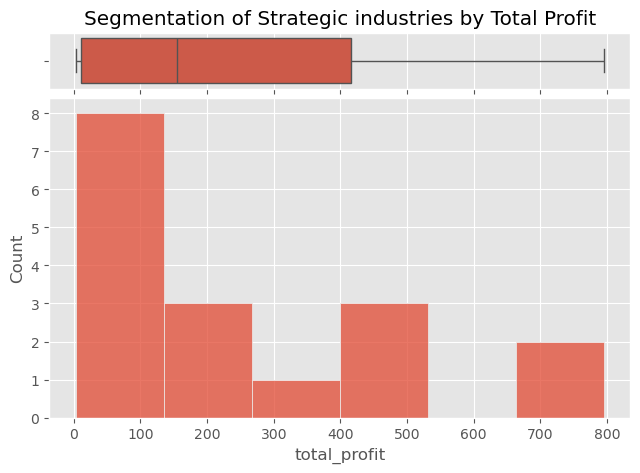

0.0000     2.7240
0.2500    10.4496
0.5000   154.6034
0.7500   415.7924
1.0000   795.3321
Name: total_profit, dtype: float64
Based on the distribution above, we will group Strategic industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 415.79 in profit
- 3 (Good) : Contributes between 154.60 and 415.79 in profit
- 2 (Marginal) : Contributes between 10.45 and 154.60 in profit
- 1 (Underperforming) : Contributes less than 10.45 in profit


In [47]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=strategic_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=strategic_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of Strategic industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = strategic_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group Strategic industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [48]:
strategic_positive_profit_metrics['segmentation score'] = pd.qcut(
    strategic_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

strategic_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
20,AMER,Strategic,Finance,795.3321,0.0000,4
44,APJ,Strategic,Manufacturing,729.3430,0.0500,4
69,EMEA,Strategic,Manufacturing,500.2916,0.0667,4
23,AMER,Strategic,Tech,429.5528,0.0222,4
17,AMER,Strategic,Communications,415.7924,0.0400,3
66,EMEA,Strategic,Consumer Products,390.0706,0.0800,3
68,EMEA,Strategic,Finance,203.2225,0.0727,3
18,AMER,Strategic,Consumer Products,161.9358,0.0000,3
21,AMER,Strategic,Healthcare,154.6034,0.0500,2
71,EMEA,Strategic,Tech,120.4816,0.1000,2


In [49]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = strategic_positive_profit_metrics[strategic_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the Strategic segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "all maintain solid profitability.\nWhile not the highest-performing, these Strategic industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese Strategic industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")

Finance in AMER, Manufacturing in APJ, Manufacturing in EMEA, Tech in AMER are the highest performing industries in the Strategic segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Communications in AMER, Consumer Products in EMEA, Finance in EMEA, Consumer Products in AMER all maintain solid profitability.
While not the highest-performing, these Strategic industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Healthcare in AMER, Tech in EMEA, Energy in AMER, Consumer Products in APJ, Retail in APJ, Retail in EMEA, Finance in APJ, Tech in APJ, Transportation in APJ are underperforming.
These Strategic industries struggle with profitability and should be approached with caution.
Strategies should focus on improvement and effic

In [50]:
###Filter negative profits (Strategic)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the Strategic segment
strategic_negative_profit_metrics = metrics[(metrics['total_profit'] < 0) & (metrics['Segment'] == 'Strategic')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
strategic_negative_profit_metrics = strategic_negative_profit_metrics.sort_values(by='total_profit', ascending=True)

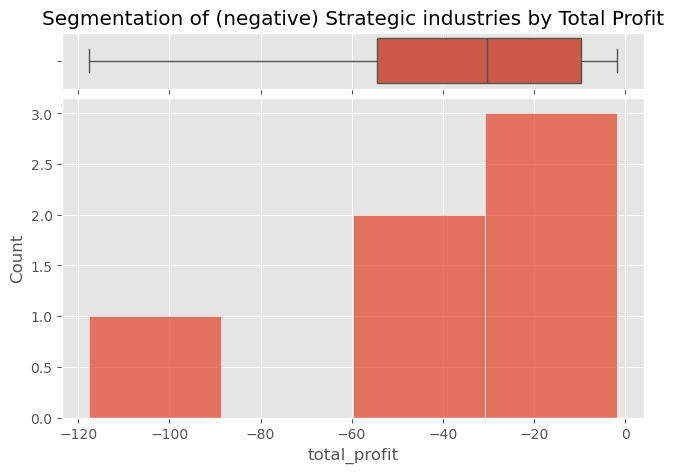

0.0000   -117.6708
0.2500    -54.3956
0.5000    -30.2040
0.7500     -9.7857
1.0000     -1.7404
Name: total_profit, dtype: float64
Based on the distribution above, we will group strategic industries based on their total profit into 4 groups, namely :
- 4 (Severe) : Loses more than -54.40 in profit
- 3 (Significant) : Loses between -54.40 and -30.20 in profit
- 2 (Negative) : Loses between -30.20 and -9.79 in profit
- 1 (Marginal) : Loses less than -9.79 in profit


In [51]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=strategic_negative_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=strategic_negative_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of (negative) Strategic industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = strategic_negative_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group strategic industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Severe) : Loses more than {quantiles[0.25]:.2f} in profit\n"
      f"- 3 (Significant) : Loses between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 2 (Negative) : Loses between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 1 (Marginal) : Loses less than {quantiles[0.75]:.2f} in profit")

In [52]:
strategic_negative_profit_metrics['segmentation score'] = pd.qcut(
    strategic_negative_profit_metrics['total_profit'],             
    q=4,                               
    labels=[4, 3, 2, 1]                 
).astype(int)

strategic_negative_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
67,EMEA,Strategic,Energy,-117.6708,0.1333,4
41,APJ,Strategic,Energy,-57.9510,0.2000,4
22,AMER,Strategic,Manufacturing,-43.7292,0.2000,3
43,APJ,Strategic,Healthcare,-16.6788,0.0500,2
39,APJ,Strategic,Communications,-7.4880,0.1000,1
72,EMEA,Strategic,Transportation,-1.7404,0.0667,1


#### Cross-segment Enterprise

In [54]:
###Filter positive profits (Enterprise)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the Enterprise segment
enterprise_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'Enterprise')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
enterprise_positive_profit_metrics = enterprise_positive_profit_metrics.sort_values(by='total_profit', ascending=False)


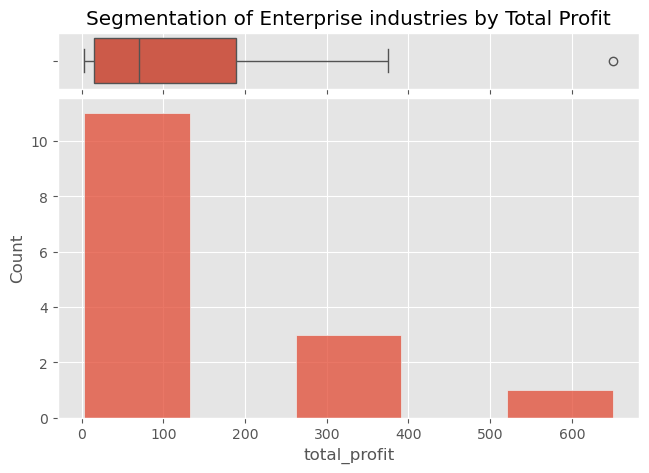

0.0000     3.2460
0.2500    15.2965
0.5000    70.1925
0.7500   188.5093
1.0000   650.2308
Name: total_profit, dtype: float64
Based on the distribution above, we will group Enterprise industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 188.51 in profit
- 3 (Good) : Contributes between 70.19 and 188.51 in profit
- 2 (Marginal) : Contributes between 15.30 and 70.19 in profit
- 1 (Underperforming) : Contributes less than 15.30 in profit


In [55]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=enterprise_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=enterprise_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of Enterprise industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = enterprise_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group Enterprise industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [56]:
enterprise_positive_profit_metrics['segmentation score'] = pd.qcut(
    enterprise_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

enterprise_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
3,AMER,Enterprise,Finance,650.2308,0.0286,4
48,EMEA,Enterprise,Communications,375.4296,0.0000,4
49,EMEA,Enterprise,Energy,288.0381,0.0600,4
7,AMER,Enterprise,Tech,266.1572,0.0000,4
4,AMER,Enterprise,Healthcare,110.8613,0.0000,3
53,EMEA,Enterprise,Retail,96.9555,0.0667,3
5,AMER,Enterprise,Manufacturing,78.8470,0.0400,3
55,EMEA,Enterprise,Transportation,70.1925,0.0000,2
28,APJ,Enterprise,Misc,26.1156,0.2000,2
29,APJ,Enterprise,Tech,18.3179,0.1000,2


In [57]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = enterprise_positive_profit_metrics[enterprise_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the Enterprise segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "all maintain solid profitability.\nWhile not the highest-performing, these Enterprise industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese Enterprise industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")


Finance in AMER, Communications in EMEA, Energy in EMEA, Tech in AMER are the highest performing industries in the Enterprise segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Healthcare in AMER, Retail in EMEA, Manufacturing in AMER all maintain solid profitability.
While not the highest-performing, these Enterprise industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Transportation in EMEA, Misc in APJ, Tech in APJ, Energy in AMER, Finance in EMEA, Retail in AMER, Manufacturing in EMEA, Tech in EMEA are underperforming.
These Enterprise industries struggle with profitability and should be approached with caution.
Strategies should focus on improvement and efficiency rather than heavy marketing and discounting.



In [58]:
###Filter negative profits (Enterprise)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the Enterprise segment
enterprise_negative_profit_metrics = metrics[(metrics['total_profit'] < 0) & (metrics['Segment'] == 'Enterprise')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
enterprise_negative_profit_metrics = enterprise_negative_profit_metrics.sort_values(by='total_profit', ascending=True)

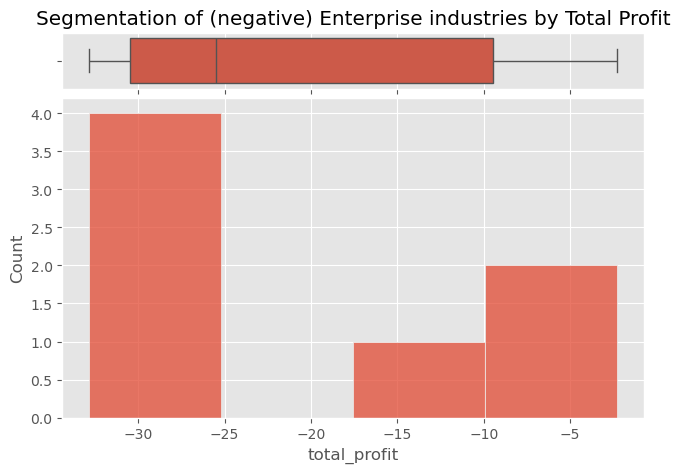

0.0000   -32.8628
0.2500   -30.5044
0.5000   -25.5241
0.7500    -9.4623
1.0000    -2.2728
Name: total_profit, dtype: float64
Based on the distribution above, we will group strategic industries based on their total profit into 4 groups, namely :
- 4 (Severe) : Loses more than -30.50 in profit
- 3 (Significant) : Loses between -30.50 and -25.52 in profit
- 2 (Negative) : Loses between -25.52 and -9.46 in profit
- 1 (Marginal) : Loses less than -9.46 in profit


In [59]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=enterprise_negative_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=enterprise_negative_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of (negative) Enterprise industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = enterprise_negative_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group strategic industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Severe) : Loses more than {quantiles[0.25]:.2f} in profit\n"
      f"- 3 (Significant) : Loses between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 2 (Negative) : Loses between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 1 (Marginal) : Loses less than {quantiles[0.75]:.2f} in profit")

In [60]:
enterprise_negative_profit_metrics['segmentation score'] = pd.qcut(
    enterprise_negative_profit_metrics['total_profit'],             
    q=4,                               
    labels=[4, 3, 2, 1]                 
).astype(int)

enterprise_negative_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
1,AMER,Enterprise,Consumer Products,-32.8628,0.1333,4
27,APJ,Enterprise,Manufacturing,-31.5720,0.2000,4
51,EMEA,Enterprise,Healthcare,-29.4368,0.2000,3
25,APJ,Enterprise,Energy,-25.5241,0.1000,3
24,APJ,Enterprise,Communications,-12.5286,0.2000,2
0,AMER,Enterprise,Communications,-6.3960,0.2000,1
26,APJ,Enterprise,Finance,-2.2728,0.1000,1


**Key findings:**
1. AMER leads in both sales and net profit, especially in December, April, and August. However, the region experiences fluctuations impacting revenue stability and financial planning. Discounts significantly reduce profits in April, July, October, and November.
2. EMEA have overall positive sales and net profit, but faces challenges with discounts causing negative net profits in August and September.
3. APJ have the lowest sales and net profit, but still contributes positively. Frequently encounters negative net profits due to discounts, especially in January, April, and September, impacting overall revenue.
4. For the SMB segment, Healthcare in AMER, Finance in EMEA, and Manufacturing in both EMEA and AMER are top performers and should be the primary focus for marketing efforts. 
5. In the Strategic segment, Finance in AMER, Manufacturing in APJ and EMEA, and Tech in AMER are excelling.
6. In the Enterprise segment, focus on Finance in AMER, Communications in EMEA, Energy in EMEA, and Tech in AMER for strategic growth.